# Evaluation with PCC and SSIM

In [1]:
import os
import time
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import torch
import scanpy as sc
import logging
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import json
print(torch.__version__)

# import FineST as fst
# from FineST.datasets import dataset
# import FineST.plottings as fstplt
# print("FineST version: %s" %fst.__version__)

2.4.1+cu121


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
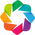

In [2]:
## From GPU2
path = '/mnt/lingyu/nfs_share2/Python/'
os.chdir(str(path) + 'FineST/FineST/')
import FineST as fst
from FineST.datasets import dataset
import FineST.plottings as fstplt

In [4]:
path = '/mnt/lingyu/nfs_share2/Python/'

fst.setup_seed(666)

if torch.cuda.is_available():
    dev = "cuda:0"
else:
    dev = "cpu"
device = torch.device(dev)

colors = ["#000003",  "#3b0f6f",  "#8c2980",   "#f66e5b", "#fd9f6c", "#fbfcbf"]
cnt_color = clr.LinearSegmentedColormap.from_list('magma', colors, N=256)

## 1. VisiumHD PCC and SSIM

**1.1 Calculate**

16um: `_adata_count.h5ad`

In [16]:
## Visium HD data
patientxy = 'CRC16um'
os.chdir(f"{path}/FineST/FineST_local/Dataset/ImputData/{patientxy}/")
adata_16um = sc.read(str(patientxy)+'_adata_count.h5ad')
gene_hv = np.array(adata_16um.var_names)
print(adata_16um)
adata_16um.to_df().head()

AnnData object with n_obs × n_vars = 136954 × 862
    obs: 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells'
    uns: 'spatial'
    obsm: 'spatial'


,TGFB1,TGFBR1,TGFBR2,TGFB2,TGFB3,ACVR1B,ACVR1C,ACVR1,BMP2,BMPR1A,...,TREM2,SEMA6A,SEMA6B,SEMA7A,PLXNC1,SIGLEC1,THY1,VCAM1,VSIR,IGSF11
s_016um_00000_00000-1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
s_016um_00001_00000-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
s_016um_00002_00000-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
s_016um_00003_00000-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
s_016um_00004_00000-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
## Visium HD data: FineST
patientxy = 'CRC16um'
adata_16um_fst = sc.read(str(patientxy)+'_adata_impt_16um.h5ad')
print(adata_16um_fst)
adata_16um_fst.to_df().head()

AnnData object with n_obs × n_vars = 136954 × 862
    obs: 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells'
    uns: 'spatial'
    obsm: 'spatial'


,TGFB1,TGFBR1,TGFBR2,TGFB2,TGFB3,ACVR1B,ACVR1C,ACVR1,BMP2,BMPR1A,...,TREM2,SEMA6A,SEMA6B,SEMA7A,PLXNC1,SIGLEC1,THY1,VCAM1,VSIR,IGSF11
s_016um_00000_00000-1,0.006440,0.007836,0.444075,0.004707,0.010670,0.004712,0.004285,0.004954,0.004538,0.004833,...,0.004501,0.004650,0.424018,0.004676,0.004698,0.004651,0.383025,0.005748,0.053099,0.003998
s_016um_00001_00000-1,0.016390,0.012257,0.142959,0.004654,0.012404,0.004805,0.004403,0.005927,0.007929,0.005637,...,0.004536,0.008545,0.087460,0.009481,0.004867,0.004725,0.051157,0.015118,0.364449,0.004032
s_016um_00002_00000-1,0.004598,0.014006,0.027656,0.004447,0.004444,0.004832,0.004293,0.004910,0.004278,0.004818,...,0.003843,0.004508,0.004363,0.004457,0.004586,0.004040,0.007196,0.004161,0.048874,0.003822
s_016um_00003_00000-1,0.004396,0.021296,0.055496,0.004197,0.003890,0.011472,0.004097,0.005241,0.004114,0.005033,...,0.003204,0.004408,0.003936,0.004248,0.004269,0.003347,0.008891,0.003666,0.004225,0.003767
s_016um_00004_00000-1,0.004498,0.012614,0.030001,0.004401,0.004313,0.004830,0.004157,0.004893,0.004125,0.004979,...,0.003551,0.004424,0.004241,0.004357,0.004517,0.003740,0.007572,0.004014,0.004449,0.003748


In [39]:
#############################
# PCC: CRC-16um
#############################
columns_result_df, _ = fst.PCC(adata_16um.to_df(), adata_16um_fst.to_df())
print("columns_result_df: \n", columns_result_df)

columns_result_df: 
         Gene  correlation_coefficient  p_value
0      TGFB1                 0.959522      0.0
1     TGFBR1                 0.953264      0.0
2     TGFBR2                 0.949944      0.0
3      TGFB2                 0.956116      0.0
4      TGFB3                 0.954979      0.0
..       ...                      ...      ...
857  SIGLEC1                 0.958431      0.0
858     THY1                 0.957052      0.0
859    VCAM1                 0.956899      0.0
860     VSIR                 0.956618      0.0
861   IGSF11                 0.962299      0.0

[862 rows x 3 columns]


columns_result_df: 
         Gene  correlation_coefficient  p_value
0      TGFB1                 0.959522      0.0
1     TGFBR1                 0.953264      0.0
2     TGFBR2                 0.949944      0.0
3      TGFB2                 0.956116      0.0
4      TGFB3                 0.954979      0.0
..       ...                      ...      ...
857  SIGLEC1                 0.958431      0.0
858     THY1                 0.957052      0.0
859    VCAM1                 0.956899      0.0
860     VSIR                 0.956618      0.0
861   IGSF11                 0.962299      0.0

[862 rows x 3 columns]

In [ ]:
# ## save
# patientxy = 'CRC16um'
# os.chdir(str(path)+'FineST/FineST_local/Dataset/'+str(patientxy)+'/Compare')
# columns_result_df.to_csv("cor_FineST_Gene_virchow2.csv")   

In [18]:
#############################
# SSIM: CRC-16um
#############################
print(adata_16um.obsm['spatial'])
print(adata_16um_fst.obsm['spatial'])

[[40624.276539 22352.723279]
 [40625.065572 22294.294759]
 [40625.854602 22235.866427]
 ...
 [65264.951645  5152.871167]
 [65265.701087  5094.473559]
 [65266.450528  5036.076139]]
[[40624.276539 22352.723279]
 [40625.065572 22294.294759]
 [40625.854602 22235.866427]
 ...
 [65264.951645  5152.871167]
 [65265.701087  5094.473559]
 [65266.450528  5036.076139]]


In [19]:
def count_rows_and_cols(locs):
    min_row, max_row = np.min(locs[:, 0]), np.max(locs[:, 0])
    min_col, max_col = np.min(locs[:, 1]), np.max(locs[:, 1])
    num_rows = max_row - min_row + 1
    num_cols = max_col - min_col + 1
    return (num_rows, num_cols)

(136954, 2)
[[  0   0]
 [  0   1]
 [  0   2]
 ...
 [418 300]
 [418 301]
 [418 302]]
Number of rows and columns:  (419, 386)


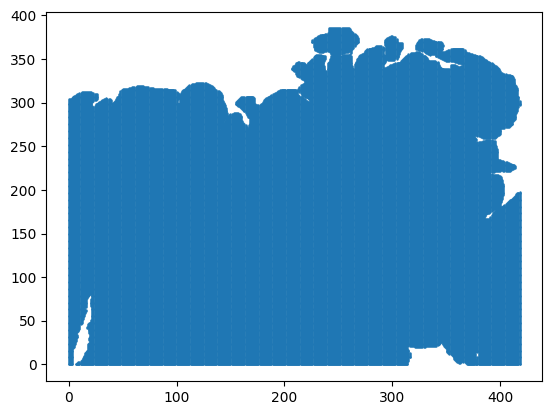

In [20]:
locs = np.stack((adata_16um.obs['array_row'], adata_16um.obs['array_col'])).T
print(locs.shape)
print(locs)

(num_rows, num_cols) = count_rows_and_cols(locs)
print("Number of rows and columns: ", (num_rows, num_cols) )

plt.scatter(locs[:,0], locs[:,1],s=0.5)

In [22]:
ssim_dict_16um = {}
for gene in gene_hv:
    origal_exp = fst.vector2matrix(locs, np.array(adata_16um.to_df()[gene]), shape=count_rows_and_cols(locs))
    FineST_exp = fst.vector2matrix(locs, np.array(adata_16um_fst.to_df()[gene]), shape=count_rows_and_cols(locs))
    ssim_index = fst.compute_ssim(origal_exp, FineST_exp)
    ssim_dict_16um[gene] = ssim_index

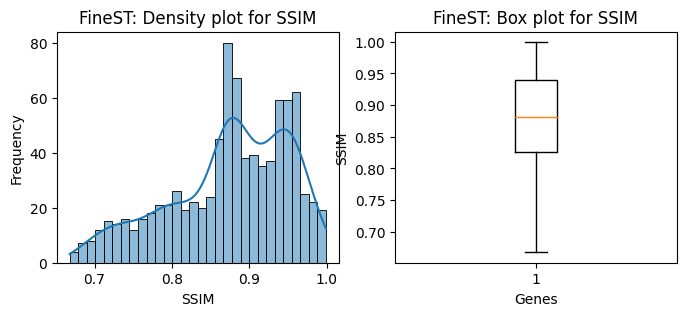

In [23]:
fig = plt.figure(figsize=(8,3))

plt.subplot(1,2,1)
sns.histplot(ssim_dict_16um, bins=30, kde=True)
plt.xlabel('SSIM')
plt.ylabel("Frequency")
plt.title('FineST: Density plot for SSIM')

plt.subplot(1,2,2)
plt.boxplot(ssim_dict_16um.values())
plt.xlabel('Genes')
plt.ylabel('SSIM')
plt.title('FineST: Box plot for SSIM')

plt.show()

In [24]:
ssim_mean_16um = np.mean(list(ssim_dict_16um.values()))
print("Mean SSIM_16um: ", ssim_mean_16um )

Mean SSIM_16um:  0.8743131922962378


In [25]:
ssim_df_16 = pd.DataFrame(list(ssim_dict_16um.values()), index=ssim_dict_16um.keys(), columns=['FineSTSSIM16um'])
ssim_df_16

,FineSTSSIM16um
TGFB1,0.746183
TGFBR1,0.715036
TGFBR2,0.719995
TGFB2,0.861877
TGFB3,0.887538
...,...
SIGLEC1,0.856995
THY1,0.821498
VCAM1,0.852845
VSIR,0.802695


FineSTSSIM16um
TGFB1	0.746183
TGFBR1	0.715036
TGFBR2	0.719995
TGFB2	0.861877
TGFB3	0.887538
...	...
SIGLEC1	0.856995
THY1	0.821498
VCAM1	0.852845
VSIR	0.802695
IGSF11	0.829383
862 rows × 1 columns

In [26]:
# ## save data
# patientxy = 'CRC16um'
# os.chdir(str(path)+'FineST/FineST_local/Dataset/'+str(patientxy)+'/Compare/')
# ssim_df_16.to_csv("SSIM_FineST_16um.csv")   

8um: `_adata_impt_align_8um.h5ad`

In [27]:
## Visium HD data: FineST
patientxy = 'CRC16um'
os.chdir(f"{path}/FineST/FineST_local/Dataset/ImputData/{patientxy}/")
adata_8um_fst = sc.read(str(patientxy)+'_adata_impt_align_8um.h5ad')
gene_hv = np.array(adata_8um_fst.var_names)
print(adata_8um_fst)
adata_8um_fst.to_df().head()

AnnData object with n_obs × n_vars = 545913 × 862
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells'
    uns: 'spatial'
    obsm: 'spatial'


,TGFB1,TGFBR1,TGFBR2,TGFB2,TGFB3,ACVR1B,ACVR1C,ACVR1,BMP2,BMPR1A,...,TREM2,SEMA6A,SEMA6B,SEMA7A,PLXNC1,SIGLEC1,THY1,VCAM1,VSIR,IGSF11
s_008um_00301_00321-1,0.004802,0.004537,0.217558,0.004571,0.004962,0.004706,0.004320,0.004939,0.006642,0.029217,...,0.004593,0.028352,0.062449,0.004829,0.004697,0.004764,0.067290,0.067409,0.004916,0.003943
s_008um_00526_00291-1,0.004619,0.063404,1.191899,0.004241,0.003912,0.556604,0.004799,0.013139,0.004475,0.099277,...,0.003884,0.356636,0.004161,0.004514,0.004365,0.003982,0.050424,0.027434,0.004478,0.004787
s_008um_00078_00444-1,0.010093,0.067879,0.111165,0.004728,0.012728,0.004748,0.004459,0.004979,0.004603,0.004911,...,0.004891,0.004765,0.004833,0.004709,0.004949,0.004877,0.092232,0.004809,0.004825,0.004199
s_008um_00128_00278-1,0.014515,0.004951,0.372087,0.004632,0.033368,0.004514,0.003828,0.006902,0.004699,0.004986,...,0.004398,0.004782,0.016587,0.004843,0.004963,0.004836,0.159267,0.014801,0.657198,0.003803
s_008um_00052_00559-1,0.004467,0.004763,0.004520,0.004207,0.121326,0.006001,0.004775,0.004932,0.004807,0.004903,...,0.003320,0.063477,0.004154,0.004155,0.004221,0.003919,0.003843,0.027888,0.340131,0.003727


In [28]:
## Visium HD data
adata_8um = dataset.CRC08um()
adata_8um = adata_8um[:, adata_8um_fst.var_names]
print(adata_8um)
adata_8um.to_df().head()

View of AnnData object with n_obs × n_vars = 545913 × 862
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'


,TGFB1,TGFBR1,TGFBR2,TGFB2,TGFB3,ACVR1B,ACVR1C,ACVR1,BMP2,BMPR1A,...,TREM2,SEMA6A,SEMA6B,SEMA7A,PLXNC1,SIGLEC1,THY1,VCAM1,VSIR,IGSF11
s_008um_00301_00321-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
s_008um_00526_00291-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
s_008um_00078_00444-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
s_008um_00128_00278-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
s_008um_00052_00559-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [8]:
#############################
# PCC: CRC-08um
#############################
columns_result_df8um, _ = fst.PCC(adata_8um.to_df(), adata_8um_fst.to_df())
print("columns_result_df8um: \n", columns_result_df8um)

columns_result_df8um: 
         Gene  correlation_coefficient  p_value
0      TGFB1                 0.493279      0.0
1     TGFBR1                 0.516551      0.0
2     TGFBR2                 0.585600      0.0
3      TGFB2                 0.486170      0.0
4      TGFB3                 0.496024      0.0
..       ...                      ...      ...
857  SIGLEC1                 0.488934      0.0
858     THY1                 0.593086      0.0
859    VCAM1                 0.533938      0.0
860     VSIR                 0.491745      0.0
861   IGSF11                 0.473689      0.0

[862 rows x 3 columns]


columns_result_df8um: 
         Gene  correlation_coefficient  p_value
0      TGFB1                 0.493279      0.0
1     TGFBR1                 0.516551      0.0
2     TGFBR2                 0.585600      0.0
3      TGFB2                 0.486170      0.0
4      TGFB3                 0.496024      0.0
..       ...                      ...      ...
857  SIGLEC1                 0.488934      0.0
858     THY1                 0.593086      0.0
859    VCAM1                 0.533938      0.0
860     VSIR                 0.491745      0.0
861   IGSF11                 0.473689      0.0

[862 rows x 3 columns]

In [ ]:
####################
# save PCC data
####################
# patientxy = 'CRC16um'
# os.chdir(str(path)+'FineST/FineST_local/Dataset/'+str(patientxy)+'/Compare')
# columns_result_df8um.to_csv("cor_FineST_Gene8um_virchow2.csv")   

In [30]:
#############################
# SSIM: CRC-08um
#############################
print(adata_8um.obsm['spatial'])
print(adata_8um_fst.obsm['spatial'])

[[50098.44599806 13700.15733608]
 [49309.78016718  7118.67845626]
 [53604.07234532 20262.14773454]
 ...
 [47953.06144821  5962.11633488]
 [54673.24055804 12241.90809485]
 [58678.13551704  5227.02922183]]
[[50098.44599806 13700.15733608]
 [49309.78016718  7118.67845626]
 [53604.07234532 20262.14773454]
 ...
 [47953.06144821  5962.11633488]
 [54673.24055804 12241.90809485]
 [58678.13551704  5227.02922183]]


In [31]:
def count_rows_and_cols(locs):
    min_row, max_row = np.min(locs[:, 0]), np.max(locs[:, 0])
    min_col, max_col = np.min(locs[:, 1]), np.max(locs[:, 1])
    num_rows = max_row - min_row + 1
    num_cols = max_col - min_col + 1
    return (num_rows, num_cols)

(545913, 2)
[[321 301]
 [291 526]
 [444  78]
 ...
 [244 565]
 [477 353]
 [611 595]]
Number of rows and columns:  (838, 838)


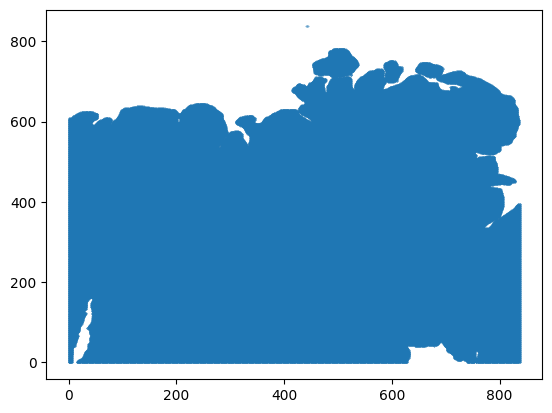

In [32]:
# locs = np.stack((adata_8um.obs['array_row'], adata_8um.obs['array_col'])).T    # For 16um
locs = np.stack((adata_8um.obs['array_col'], adata_8um.obs['array_row'])).T

print(locs.shape)
print(locs)

(num_rows, num_cols) = count_rows_and_cols(locs)
print("Number of rows and columns: ", (num_rows, num_cols) )

plt.scatter(locs[:,0], locs[:,1],s=0.05)

In [33]:
ssim_dict_8um = {}
for gene in gene_hv:
    origal_exp = fst.vector2matrix(locs, np.array(adata_8um.to_df()[gene]), shape=count_rows_and_cols(locs))
    FineST_exp = fst.vector2matrix(locs, np.array(adata_8um_fst.to_df()[gene]), shape=count_rows_and_cols(locs))
    ssim_index = fst.compute_ssim(origal_exp, FineST_exp)
    ssim_dict_8um[gene] = ssim_index

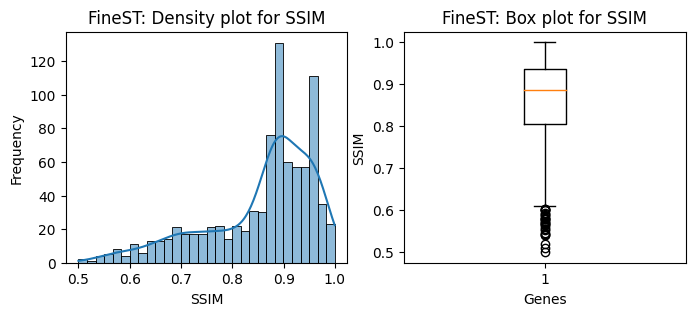

In [34]:
fig = plt.figure(figsize=(8,3))

plt.subplot(1,2,1)
sns.histplot(ssim_dict_8um, bins=30, kde=True)
plt.xlabel('SSIM')
plt.ylabel("Frequency")
plt.title('FineST: Density plot for SSIM')

plt.subplot(1,2,2)
plt.boxplot(ssim_dict_8um.values())
plt.xlabel('Genes')
plt.ylabel('SSIM')
plt.title('FineST: Box plot for SSIM')

plt.show()

In [45]:
ssim_mean_8um = np.mean(list(ssim_dict_8um.values()))
print("Mean SSIM_08um: ", ssim_mean_8um)
ssim_df_8 = pd.DataFrame(list(ssim_dict_8um.values()), index=ssim_dict_8um.keys(), columns=['FineSTSSIM08um'])
ssim_df_8

Mean SSIM_08um:  0.8567502506390251


,FineSTSSIM08um
TGFB1,0.703741
TGFBR1,0.602055
TGFBR2,0.540649
TGFB2,0.889949
TGFB3,0.889876
...,...
SIGLEC1,0.887236
THY1,0.756433
VCAM1,0.873099
VSIR,0.775450


FineSTSSIM08um
TGFB1	0.703741
TGFBR1	0.602055
TGFBR2	0.540649
TGFB2	0.889949
TGFB3	0.889876
...	...
SIGLEC1	0.887236
THY1	0.756433
VCAM1	0.873099
VSIR	0.775450
IGSF11	0.845365
862 rows × 1 columns

In [46]:
# ## save data
# patientxy = 'CRC16um'
# os.chdir(str(path)+'FineST/FineST_local/Dataset/'+str(patientxy)+'/Compare/')
# ssim_df_8.to_csv("SSIM_FineST_08um.csv")   

**1.2 Plot SSIM**

In [5]:
#############################
# SSIM: 16um
#############################
patientxy = 'CRC_human'
os.chdir(str(path)+'NPC/Data/stdata/ImputData/'+str(patientxy)+'/')
# ssim_FineST = pd.read_csv('SSIM_FineST.csv')    ## last verson
ssim_iStar = pd.read_csv('SSIM_iStar.csv')
# print(ssim_FineST.head())
print(ssim_iStar.head())


patientxy = 'CRC16um'
os.chdir(str(path)+'FineST/FineST_local/Dataset/'+str(patientxy)+'/Compare/')
ssim_FineST = pd.read_csv("SSIM_FineST_16um.csv")   
print(ssim_FineST.head())

  Unnamed: 0  iStarSSIM16um
0      TGFB1       0.427325
1     TGFBR1       0.304728
2     TGFBR2       0.269954
3      TGFB2       0.733986
4      TGFB3       0.750552
  Unnamed: 0  FineSTSSIM16um
0      TGFB1        0.746183
1     TGFBR1        0.715036
2     TGFBR2        0.719995
3      TGFB2        0.861877
4      TGFB3        0.887538


In [6]:
print(ssim_iStar['iStarSSIM16um'].mean())
print(ssim_FineST['FineSTSSIM16um'].mean())

0.7708900170138114
0.8743131922962378


In [22]:
print(ssim_iStar[ssim_iStar['Unnamed: 0'] == 'BMP2'])
print(ssim_FineST[ssim_FineST['Unnamed: 0'] == 'BMP2'])

  Unnamed: 0  iStarSSIM16um
8       BMP2       0.754633
  Unnamed: 0  FineSTSSIM16um
8       BMP2        0.901778


In [29]:
ssim_iStar['iStarSSIM16um'].max()

0.998267977461468

merged_df: (862, 3)


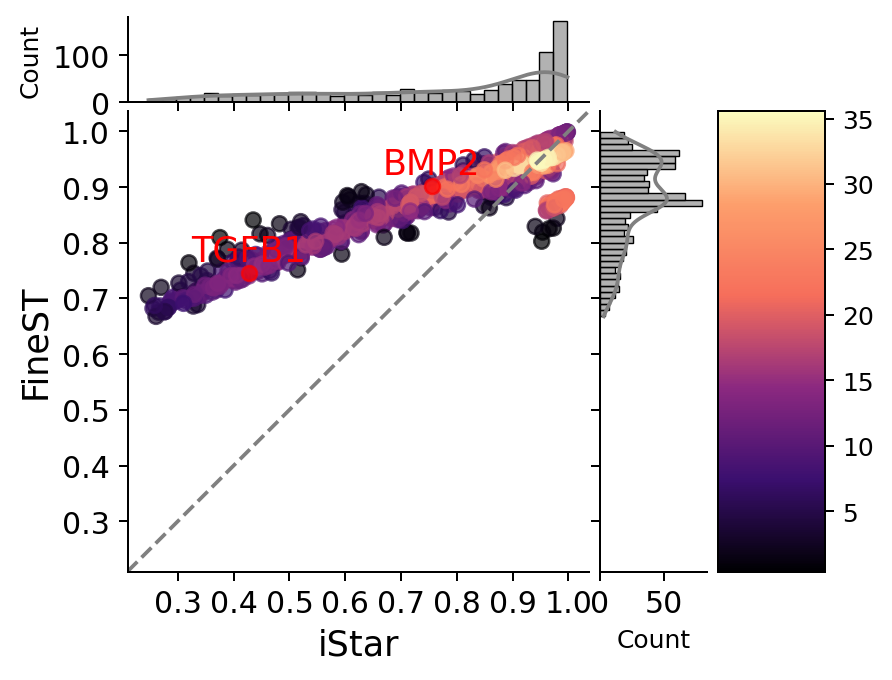

In [36]:
ssim_FineST = ssim_FineST.rename(columns={'Unnamed: 0': 'Gene', 'FineSTSSIM16um': 'FineST'})
ssim_iStar = ssim_iStar.rename(columns={'Unnamed: 0': 'Gene', 'iStarSSIM16um': 'iStar'})

patientxy = 'CRC16um'
os.chdir(str(path)+'FineST/FineST_local/Dataset/'+str(patientxy)+'/Compare')
fstplt.plot_SSIM_revised(ssim_FineST, ssim_iStar, 'Gene', 'iStar', 'FineST', 
                         gene_set=['TGFB1', 'BMP2'], title='Gene SSIM: FineST vs iStar', 
                         max_step=0.1, min_step=0.1, fig_size=(5, 4), trans=True, format='svg', 
                         # save_path=None)
                         save_path="gene_ssim_FineST_iStar_16um.svg")

In [7]:
######################################
# 8 um
######################################
patientxy = 'CRC_human'
os.chdir(str(path)+'NPC/Data/stdata/ImputData/'+str(patientxy)+'/Result_8um')
# ssim_FineST_8um = pd.read_csv('SSIM_FineST_8um.csv')
ssim_iStar_8um = pd.read_csv('SSIM_iStar_8um.csv')
# print(ssim_FineST_8um.head())
print(ssim_iStar_8um.head())

patientxy = 'CRC16um'
os.chdir(str(path)+'FineST/FineST_local/Dataset/'+str(patientxy)+'/Compare/')
ssim_FineST_8um = pd.read_csv("SSIM_FineST_08um.csv")   
print(ssim_FineST_8um.head())

  Unnamed: 0  iStarSSIM08um
0      TGFB1       0.610172
1     TGFBR1       0.314413
2     TGFBR2       0.232796
3      TGFB2       0.902048
4      TGFB3       0.826286
  Unnamed: 0  FineSTSSIM08um
0      TGFB1        0.703741
1     TGFBR1        0.602055
2     TGFBR2        0.540649
3      TGFB2        0.889949
4      TGFB3        0.889876


In [17]:
ssim_iStar_8um['iStarSSIM08um'] == 'BMP2'

0      False
1      False
2      False
3      False
4      False
       ...  
857    False
858    False
859    False
860    False
861    False
Name: iStarSSIM08um, Length: 862, dtype: bool

In [18]:
print(ssim_iStar['iStarSSIM16um'].mean())
print(ssim_FineST['FineSTSSIM16um'].mean())

0.7708900170138114
0.8743131922962378


In [21]:
print(ssim_iStar_8um[ssim_iStar_8um['Unnamed: 0'] == 'BMP2'])
print(ssim_FineST_8um[ssim_FineST_8um['Unnamed: 0'] == 'BMP2'])

  Unnamed: 0  iStarSSIM08um
8       BMP2       0.797325
  Unnamed: 0  FineSTSSIM08um
8       BMP2        0.891103


merged_df: (862, 3)


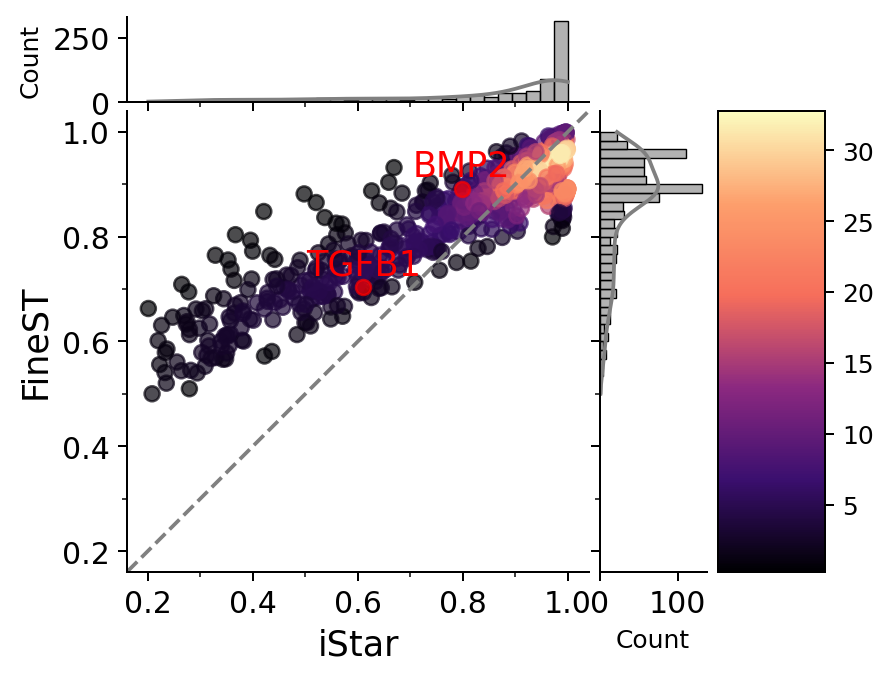

In [8]:
ssim_FineST_8um = ssim_FineST_8um.rename(columns={'Unnamed: 0': 'Gene', 'FineSTSSIM08um': 'FineST'})
ssim_iStar_8um = ssim_iStar_8um.rename(columns={'Unnamed: 0': 'Gene', 'iStarSSIM08um': 'iStar'})

patientxy = 'CRC16um'
os.chdir(str(path)+'FineST/FineST_local/Dataset/'+str(patientxy)+'/Compare')
fstplt.plot_SSIM_revised(ssim_FineST_8um, ssim_iStar_8um, 'Gene', 'iStar', 'FineST', 
                         gene_set=['TGFB1', 'BMP2'], title='Gene SSIM: FineST vs iStar', 
                         max_step=0.2, min_step=0.1, fig_size=(5, 4), trans=True, format='svg', 
                         save_path=None)
                         # save_path="gene_ssim_FineST_iStar_8um.svg")

**1.3 Plot PCC**

In [30]:
#############################
# PCC - 8um
#############################
patientxy = 'CRC_human'
os.chdir(str(path)+'NPC/Data/stdata/ImputData/'+str(patientxy)+'/Result_8um/')
cor_iStar_Gene = pd.read_csv('cor_iStar_Gene.csv')

patientxy = 'CRC16um'
os.chdir(str(path)+'FineST/FineST_local/Dataset/'+str(patientxy)+'/Compare')
cor_FineST_Gene = pd.read_csv('cor_FineST_Gene8um_virchow2.csv')

print(cor_FineST_Gene)
print(cor_iStar_Gene)

print(cor_FineST_Gene[cor_FineST_Gene['Gene']=='BMP2'])
print(cor_iStar_Gene[cor_iStar_Gene['Gene']=='BMP2'])
print(cor_FineST_Gene['correlation_coefficient'].mean(), cor_iStar_Gene['correlation_coefficient'].mean())

     Unnamed: 0     Gene  correlation_coefficient  p_value
0             0    TGFB1                 0.493279      0.0
1             1   TGFBR1                 0.516551      0.0
2             2   TGFBR2                 0.585600      0.0
3             3    TGFB2                 0.486170      0.0
4             4    TGFB3                 0.496024      0.0
..          ...      ...                      ...      ...
857         857  SIGLEC1                 0.488934      0.0
858         858     THY1                 0.593086      0.0
859         859    VCAM1                 0.533938      0.0
860         860     VSIR                 0.491745      0.0
861         861   IGSF11                 0.473689      0.0

[862 rows x 4 columns]
     Unnamed: 0     Gene  correlation_coefficient       p_value
0             0    TGFB1                 0.118268  0.000000e+00
1             1   TGFBR1                 0.180254  0.000000e+00
2             2   TGFBR2                 0.358347  0.000000e+00
3           

merged_df: (862, 7)


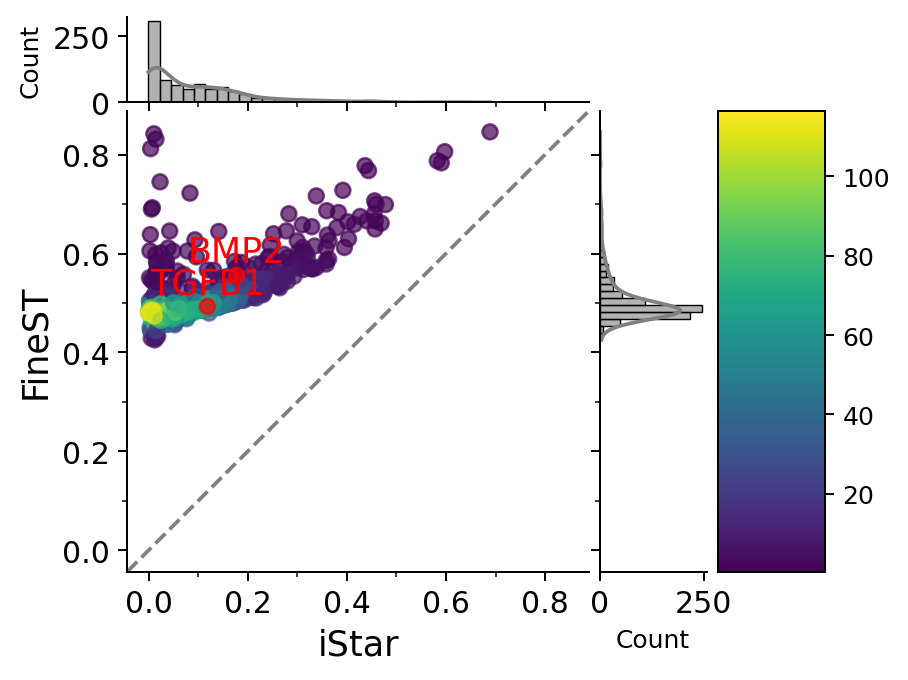

In [18]:
cor_FineST_Gene = cor_FineST_Gene.rename(columns={'Gene': 'Gene', 'correlation_coefficient': 'FineST'})
cor_iStar_Gene = cor_iStar_Gene.rename(columns={'Gene': 'Gene', 'correlation_coefficient': 'iStar'})

import os
patientxy = 'CRC16um'
os.chdir(str(path)+'FineST/FineST_local/Dataset/'+str(patientxy)+'/Compare')
fstplt.plot_PCC_revised(cor_FineST_Gene, cor_iStar_Gene, 'Gene', 'iStar', 'FineST', 
                                gene_set=['TGFB1', 'BMP2'], title='Gene cor: FineST vs iStar', fig_size=(5, 4), 
                                trans=True,  format='svg', 
                                save_path=None)
                                # save_path='gene_cor_FineST_iStar_8um.svg')

In [27]:
#############################
# PCC - 16um
#############################
import os
patientxy = 'CRC_human'
os.chdir(str(path)+'NPC/Data/stdata/ImputData/'+str(patientxy))
cor_iStar_Gene = pd.read_csv('cor_iStar_Gene.csv')

patientxy = 'CRC16um'
os.chdir(str(path)+'FineST/FineST_local/Dataset/'+str(patientxy)+'/Compare')
cor_FineST_Gene = pd.read_csv('cor_FineST_Gene_virchow2.csv')


print(cor_FineST_Gene)
print(cor_iStar_Gene)

print(cor_FineST_Gene[cor_FineST_Gene['Gene']=='BMP2'])
print(cor_iStar_Gene[cor_iStar_Gene['Gene']=='BMP2'])
print(cor_FineST_Gene['correlation_coefficient'].mean(), cor_iStar_Gene['correlation_coefficient'].mean())

     Unnamed: 0     Gene  correlation_coefficient  p_value
0             0    TGFB1                 0.959522      0.0
1             1   TGFBR1                 0.953264      0.0
2             2   TGFBR2                 0.949944      0.0
3             3    TGFB2                 0.956116      0.0
4             4    TGFB3                 0.954979      0.0
..          ...      ...                      ...      ...
857         857  SIGLEC1                 0.958431      0.0
858         858     THY1                 0.957052      0.0
859         859    VCAM1                 0.956899      0.0
860         860     VSIR                 0.956618      0.0
861         861   IGSF11                 0.962299      0.0

[862 rows x 4 columns]
     Unnamed: 0     Gene  correlation_coefficient       p_value
0             0    TGFB1                 0.223272  0.000000e+00
1             1   TGFBR1                 0.328922  0.000000e+00
2             2   TGFBR2                 0.574864  0.000000e+00
3           

merged_df: (862, 7)


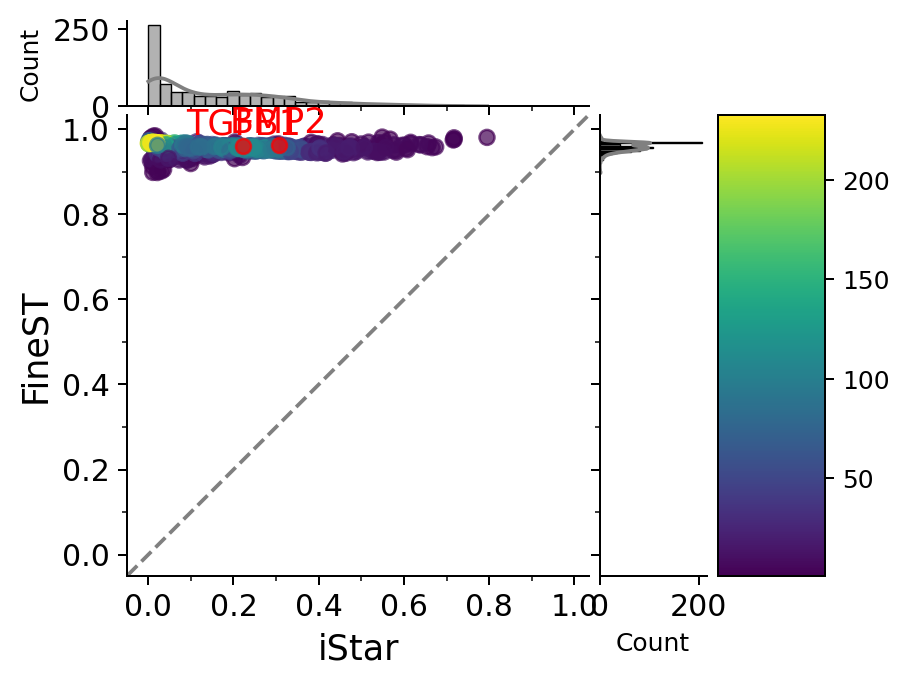

In [28]:
cor_FineST_Gene = cor_FineST_Gene.rename(columns={'Gene': 'Gene', 'correlation_coefficient': 'FineST'})
cor_iStar_Gene = cor_iStar_Gene.rename(columns={'Gene': 'Gene', 'correlation_coefficient': 'iStar'})

import os
patientxy = 'CRC16um'
os.chdir(str(path)+'FineST/FineST_local/Dataset/'+str(patientxy)+'/Compare')
fstplt.plot_PCC_revised(cor_FineST_Gene, cor_iStar_Gene, 'Gene', 'iStar', 'FineST', 
                                gene_set=['TGFB1', 'BMP2'], title='Gene cor: FineST vs iStar', fig_size=(5, 4), 
                                trans=True,  format='svg', 
                                save_path=None)
                                # save_path='gene_cor_FineST_iStar_16um.svg')

## 2. Visium PCC and SSIM

**2.1 Calculate PCC**

In [5]:
## Visium data
patientxy = 'patient1'
os.chdir(f"{path}/FineST/FineST_local/Dataset/ImputData/{patientxy}/")
adata_spot = sc.read(str(patientxy)+'_adata_count.h5ad')
gene_hv = np.array(adata_spot.var_names)
print(adata_spot)
adata_spot.to_df().head()

AnnData object with n_obs × n_vars = 1331 × 596
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells'
    uns: 'spatial'
    obsm: 'spatial'


,TGFB1,TGFBR1,TGFBR2,TGFB2,TGFB3,ACVR1B,ACVR1C,ACVR1,BMP2,BMPR1A,...,KDR,TREM2,SEMA6A,SEMA6B,SEMA7A,PLXNC1,SIGLEC1,THY1,VCAM1,VSIR
GTCGTTATTCGCTTAT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
ACAAGGGCAGGCTCTG-1,5.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,5.0,1.0
TGCGTTTGTTGACACT-1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTGAATATGGACTTTC-1,1.0,1.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,0.0
CCGGGCGGTCTCGTCA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [6]:
## Visium data: FineST-subspot
patientxy = 'patient1'
adata_spot_fst = sc.read(str(patientxy)+'_adata_imput_spot_scale.h5ad')
# adata_spot_fst = sc.read(str(patientxy)+'_adata_imput_spot.h5ad')
print(adata_spot_fst)
adata_spot_fst.to_df().head()

AnnData object with n_obs × n_vars = 1331 × 596
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells'
    uns: 'spatial'
    obsm: 'spatial'


,TGFB1,TGFBR1,TGFBR2,TGFB2,TGFB3,ACVR1B,ACVR1C,ACVR1,BMP2,BMPR1A,...,KDR,TREM2,SEMA6A,SEMA6B,SEMA7A,PLXNC1,SIGLEC1,THY1,VCAM1,VSIR
GTCGTTATTCGCTTAT-1,0.001872,0.001744,0.000386,0.000194,0.000493,0.000309,0.000244,0.000185,0.000278,0.000310,...,0.000306,0.000200,0.000318,0.000275,0.003112,0.000155,0.000168,0.003386,0.004949,0.002870
ACAAGGGCAGGCTCTG-1,0.008374,0.004375,0.003087,0.000172,0.000297,0.000267,0.000347,0.000292,0.001624,0.000220,...,0.000312,0.000169,0.000422,0.001618,0.002823,0.000146,0.000157,0.004858,0.011660,0.003620
TGCGTTTGTTGACACT-1,0.000631,0.000677,0.001658,0.000331,0.000291,0.001821,0.000083,0.000293,0.000243,0.000194,...,0.000177,0.000155,0.000392,0.000227,0.000327,0.000091,0.000124,0.000836,0.001812,0.000805
TTGAATATGGACTTTC-1,0.003222,0.002967,0.003179,0.000149,0.001603,0.000298,0.000428,0.001567,0.000235,0.001587,...,0.000285,0.000169,0.000381,0.000260,0.001775,0.000538,0.000160,0.005285,0.009362,0.002456
CCGGGCGGTCTCGTCA-1,0.001243,0.000896,0.000536,0.000366,0.000381,0.000735,0.000170,0.000188,0.000472,0.000248,...,0.000265,0.000184,0.000930,0.000238,0.000992,0.000344,0.000147,0.002901,0.005959,0.001746


In [7]:
## Visium data: FineST-sc
patientxy = 'patient1'
os.chdir(f"{path}/FineST/FineST_local/Dataset/ImputData/{patientxy}/")
adata_impt_all_sc_fst = sc.read_h5ad(filename=f"{patientxy}_adata_imput_all_sc.h5ad")     
print(adata_impt_all_sc_fst)

## mapping sc to spot, keep spot coords
adata_impt_all_sc_spot,_,_ = fst.align_adata_fst2hd(adata_impt_all_sc_fst, adata_spot)
print(adata_impt_all_sc_spot)
adata_impt_all_sc_spot.to_df().head()

AnnData object with n_obs × n_vars = 40068 × 596
    obs: 'x', 'y'
    uns: 'spatial'
    obsm: 'spatial'
AnnData object with n_obs × n_vars = 1331 × 596
    obs: 'x', 'y'
    uns: 'spatial'
    obsm: 'spatial'


,TGFB1,TGFBR1,TGFBR2,TGFB2,TGFB3,ACVR1B,ACVR1C,ACVR1,BMP2,BMPR1A,...,KDR,TREM2,SEMA6A,SEMA6B,SEMA7A,PLXNC1,SIGLEC1,THY1,VCAM1,VSIR
GTCGTTATTCGCTTAT-1,0.206717,0.147367,0.030726,0.052176,0.088921,0.099790,0.003479,0.044014,0.004420,0.084758,...,0.017959,0.004092,0.004650,0.011016,0.621447,0.003987,0.004278,0.527935,0.270670,0.238229
ACAAGGGCAGGCTCTG-1,2.518707,1.070153,0.950287,0.050064,0.063728,0.144894,0.003236,0.073310,0.461018,0.102396,...,0.022599,0.004106,0.012113,0.469624,0.657011,0.003945,0.004171,0.998599,2.675063,0.744186
TGCGTTTGTTGACACT-1,0.139108,0.116680,0.492909,0.053875,0.036353,0.557449,0.002903,0.021969,0.007609,0.048552,...,0.004580,0.003619,0.031945,0.006920,0.118344,0.003761,0.003810,0.078809,0.256197,0.140240
TTGAATATGGACTTTC-1,0.669358,0.529692,0.851757,0.026099,0.420459,0.094266,0.003769,0.378422,0.004884,0.414350,...,0.041910,0.003948,0.054135,0.004536,0.333190,0.109976,0.004013,0.962785,1.745757,0.275177
CCGGGCGGTCTCGTCA-1,0.152859,0.077480,0.065303,0.018202,0.061791,0.079891,0.010767,0.005681,0.004984,0.054453,...,0.014064,0.004407,0.026439,0.004612,0.179911,0.032790,0.004225,0.586208,0.810615,0.180862


In [8]:
columns_result_df_subspot, _ = fst.PCC(adata_spot.to_df(), adata_spot_fst.to_df())
print(columns_result_df_subspot['correlation_coefficient'].mean())
print("columns_result_df: \n", columns_result_df_subspot)

0.878903469629164
columns_result_df: 
         Gene  correlation_coefficient        p_value
0      TGFB1                 0.914844   0.000000e+00
1     TGFBR1                 0.916458   0.000000e+00
2     TGFBR2                 0.988766   0.000000e+00
3      TGFB2                 0.735450  6.589259e-227
4      TGFB3                 0.868178   0.000000e+00
..       ...                      ...            ...
591   PLXNC1                 0.991931   0.000000e+00
592  SIGLEC1                 0.990706   0.000000e+00
593     THY1                 0.929635   0.000000e+00
594    VCAM1                 0.926408   0.000000e+00
595     VSIR                 0.898797   0.000000e+00

[596 rows x 3 columns]


In [9]:
columns_result_df_sc, _ = fst.PCC(adata_spot.to_df(), adata_impt_all_sc_spot.to_df())
print(columns_result_df_sc['correlation_coefficient'].mean())
print("columns_result_df: \n", columns_result_df_sc)

0.9519392110779029
columns_result_df: 
         Gene  correlation_coefficient  p_value
0      TGFB1                 0.942973      0.0
1     TGFBR1                 0.962707      0.0
2     TGFBR2                 0.956862      0.0
3      TGFB2                 0.929095      0.0
4      TGFB3                 0.963493      0.0
..       ...                      ...      ...
591   PLXNC1                 0.972907      0.0
592  SIGLEC1                 0.980521      0.0
593     THY1                 0.954049      0.0
594    VCAM1                 0.973015      0.0
595     VSIR                 0.953828      0.0

[596 rows x 3 columns]


In [10]:
# ## save data
# os.chdir(str(path)+'FineST/FineST_local/Dataset/NPC/Compare')
# columns_result_df_subspot.to_csv("cor_FineST_Gene_subspot_virchow2.csv")   
# columns_result_df_sc.to_csv("cor_FineST_Gene_sc_virchow2.csv")   

In [10]:
# ## save data
# os.chdir(str(path)+'FineST/FineST_local/Dataset/NPC/Compare')
# columns_result_df_subspot.to_csv("cor_FisneST_Gene_subspot_virchow2_scale.csv")   
# columns_result_df_sc.to_csv("cor_FineST_Gene_sc_virchow2_scale.csv")   

In [ ]:
#############################
# PCC: Visium-subspot
#############################
columns_result_df_spot, _ = fst.PCC(adata_spot.to_df(), adata_spot_fst.to_df())
print(columns_result_df_spot['correlation_coefficient'].mean())
print("columns_result_df_spot: \n", columns_result_df_spot)

#############################
# PCC: Visium-subspot
#############################
columns_result_df_sc, _ = fst.PCC(adata_spot.to_df(), adata_impt_all_sc_spot.to_df())
print(columns_result_df_sc['correlation_coefficient'].mean())
print("columns_result_df_sc: \n", columns_result_df_sc)

####################
## save PCC data
####################
# os.chdir(str(path)+'FineST/FineST_local/Dataset/NPC/Compare')
# columns_result_df_spot.to_csv("cor_FineST_Gene_subspot_virchow2.csv")   
# columns_result_df_sc.to_csv("cor_FineST_Gene_sc_virchow2.csv")   

###################
## save PCC data
###################
# os.chdir(str(path)+'FineST/FineST_local/Dataset/NPC/Compare')
# columns_result_df_spot.to_csv("cor_FineST_Gene_subspot_virchow2_scale.csv")   
# columns_result_df_sc.to_csv("cor_FineST_Gene_sc_virchow2_scale.csv")   

**2.2 Calculate SSIM**

In [22]:
#############################
# SSIM: subspot
#############################
print(adata_spot.obsm['spatial'])
print(adata_spot_fst.obsm['spatial'])

[[10014 10023]
 [10015  9649]
 [10016  9276]
 ...
 [ 9924  3117]
 [ 9925  2743]
 [ 9927  1997]]
[[10014 10023]
 [10015  9649]
 [10016  9276]
 ...
 [ 9924  3117]
 [ 9925  2743]
 [ 9927  1997]]


(1331, 2)
[[76 46]
 [76 44]
 [76 42]
 ...
 [75  9]
 [75  7]
 [75  3]]
Number of rows and columns:  (107, 54)


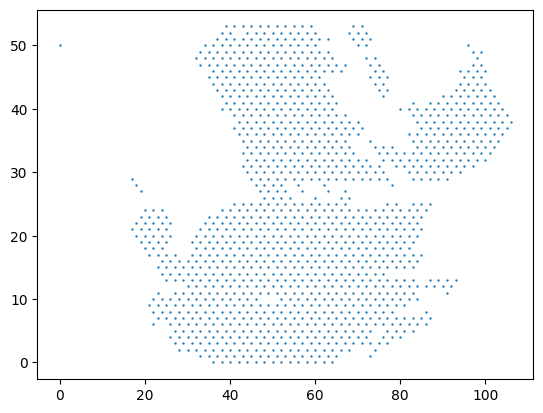

In [23]:
def count_rows_and_cols(locs):
    min_row, max_row = np.min(locs[:, 0]), np.max(locs[:, 0])
    min_col, max_col = np.min(locs[:, 1]), np.max(locs[:, 1])
    num_rows = max_row - min_row + 1
    num_cols = max_col - min_col + 1
    return (num_rows, num_cols)
    
locs_spot = np.stack((adata_spot.obs['array_row'], adata_spot.obs['array_col'])).T
print(locs_spot.shape)
print(locs_spot)

(num_rows, num_cols) = count_rows_and_cols(locs_spot)
print("Number of rows and columns: ", (num_rows, num_cols) )

plt.scatter(locs_spot[:,0], locs_spot[:,1],s=0.5)

In [24]:
ssim_dict_spot = {}
for gene in gene_hv:
    origal_exp = fst.vector2matrix(locs_spot, np.array(adata_spot.to_df()[gene]), shape=count_rows_and_cols(locs_spot))
    FineST_exp = fst.vector2matrix(locs_spot, np.array(adata_spot_fst.to_df()[gene]), shape=count_rows_and_cols(locs_spot))
    ssim_index = fst.compute_ssim(origal_exp, FineST_exp)
    ssim_dict_spot[gene] = ssim_index

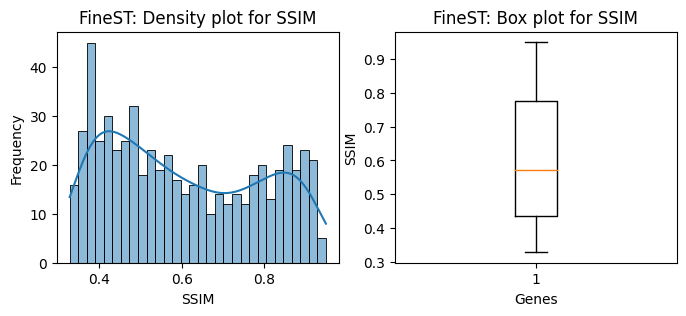

In [25]:
import seaborn as sns
fig = plt.figure(figsize=(8,3))

plt.subplot(1,2,1)
sns.histplot(ssim_dict_spot, bins=30, kde=True)
plt.xlabel('SSIM')
plt.ylabel("Frequency")
plt.title('FineST: Density plot for SSIM')

plt.subplot(1,2,2)
plt.boxplot(ssim_dict_spot.values())
plt.xlabel('Genes')
plt.ylabel('SSIM')
plt.title('FineST: Box plot for SSIM')

plt.show()

In [26]:
ssim_mean_subspot = np.mean(list(ssim_dict_spot.values()))
print("Mean SSIM_subspot: ", ssim_mean_subspot)
ssim_df_subspot = pd.DataFrame(list(ssim_dict_spot.values()), index=ssim_dict_spot.keys(), columns=['FineSTSSIM_subspot'])
ssim_df_subspot

Mean SSIM_subspot:  0.6039953383013703


,FineSTSSIM_subspot
TGFB1,0.366158
TGFBR1,0.444936
TGFBR2,0.444104
TGFB2,0.848320
TGFB3,0.552660
...,...
PLXNC1,0.496369
SIGLEC1,0.624296
THY1,0.416329
VCAM1,0.454362


In [17]:
# ## save data
# os.chdir(str(path)+'FineST/FineST_local/Dataset/NPC/Compare')
# ssim_df_subspot.to_csv("SSIM_FineST_subspot.csv")   

In [27]:
# ## save data
# os.chdir(str(path)+'FineST/FineST_local/Dataset/NPC/Compare')
# ssim_df_subspot.to_csv("SSIM_FineST_subspot_scale.csv")   

In [28]:
#############################
# SSIM: subspot
#############################
print(adata_spot.obsm['spatial'])
print(adata_impt_all_sc_spot.obsm['spatial'])

[[10014 10023]
 [10015  9649]
 [10016  9276]
 ...
 [ 9924  3117]
 [ 9925  2743]
 [ 9927  1997]]
[[10030 10047]
 [10031  9673]
 [10026  9300]
 ...
 [ 9929  3093]
 [ 9921  2770]
 [ 9943  1949]]


(1331, 2)
[[76 46]
 [76 44]
 [76 42]
 ...
 [75  9]
 [75  7]
 [75  3]]
Number of rows and columns:  (107, 54)


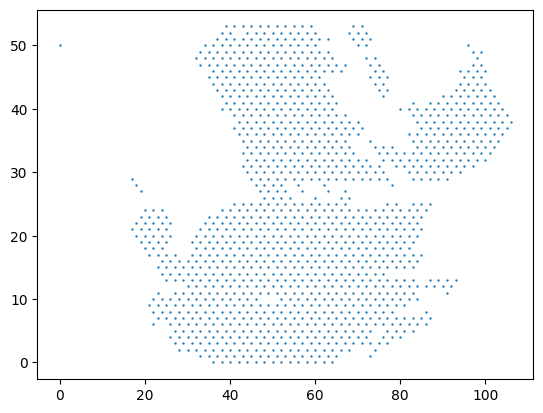

In [29]:
def count_rows_and_cols(locs):
    min_row, max_row = np.min(locs[:, 0]), np.max(locs[:, 0])
    min_col, max_col = np.min(locs[:, 1]), np.max(locs[:, 1])
    num_rows = max_row - min_row + 1
    num_cols = max_col - min_col + 1
    return (num_rows, num_cols)
    
locs_spot = np.stack((adata_spot.obs['array_row'], adata_spot.obs['array_col'])).T
print(locs_spot.shape)
print(locs_spot)

(num_rows, num_cols) = count_rows_and_cols(locs_spot)
print("Number of rows and columns: ", (num_rows, num_cols) )

plt.scatter(locs_spot[:,0], locs_spot[:,1],s=0.5)

In [30]:
ssim_dict_sc = {}
for gene in gene_hv:
    origal_exp = fst.vector2matrix(locs_spot, np.array(adata_spot.to_df()[gene]), shape=count_rows_and_cols(locs_spot))
    FineST_exp = fst.vector2matrix(locs_spot, np.array(adata_impt_all_sc_spot.to_df()[gene]), shape=count_rows_and_cols(locs_spot))
    ssim_index = fst.compute_ssim(origal_exp, FineST_exp)
    ssim_dict_sc[gene] = ssim_index

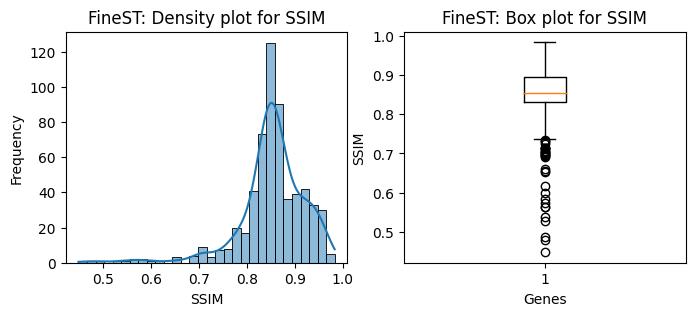

In [31]:
import seaborn as sns
fig = plt.figure(figsize=(8,3))

plt.subplot(1,2,1)
sns.histplot(ssim_dict_sc, bins=30, kde=True)
plt.xlabel('SSIM')
plt.ylabel("Frequency")
plt.title('FineST: Density plot for SSIM')

plt.subplot(1,2,2)
plt.boxplot(ssim_dict_sc.values())
plt.xlabel('Genes')
plt.ylabel('SSIM')
plt.title('FineST: Box plot for SSIM')

plt.show()

In [32]:
ssim_mean_sc = np.mean(list(ssim_dict_sc.values()))
print("Mean SSIM_sc: ", ssim_mean_sc)

Mean SSIM_sc:  0.8529671385066271


In [33]:
ssim_df_sc = pd.DataFrame(list(ssim_dict_sc.values()), index=ssim_dict_sc.keys(), columns=['FineSTSSIM_sc'])
ssim_df_sc

,FineSTSSIM_sc
TGFB1,0.840480
TGFBR1,0.842002
TGFBR2,0.805881
TGFB2,0.700201
TGFB3,0.771334
...,...
PLXNC1,0.826195
SIGLEC1,0.874152
THY1,0.827289
VCAM1,0.871302


In [25]:
# ## save data
# os.chdir(str(path)+'FineST/FineST_local/Dataset/NPC/Compare')
# ssim_df_sc.to_csv("SSIM_FineST_sc.csv")   

In [34]:
# ## save data
# os.chdir(str(path)+'FineST/FineST_local/Dataset/NPC/Compare')
# ssim_df_sc.to_csv("SSIM_FineST_sc_scale.csv")   

**2.3 Plot PCC**

In [59]:
#############################
# PCC: NPC-subspot
#############################
os.chdir(str(path)+'iSTAR/istar-master/data/NPC1/')
cor_iStar_Gene = pd.read_csv('cor_iStar_Gene.csv')
print(cor_iStar_Gene.head())

os.chdir(str(path)+'FineST/FineST_local/Dataset/NPC/Compare')
cor_FineST_Gene = pd.read_csv('cor_FineST_Gene_subspot_virchow2.csv')
# cor_FineST_Gene = pd.read_csv('cor_FineST_Gene_subspot_virchow2_scale.csv')
print(cor_FineST_Gene.head())

   Unnamed: 0    Gene  correlation_coefficient       p_value
0           0   TGFB1                 0.471325  1.469319e-74
1           1  TGFBR1                 0.252077  9.717614e-21
2           2  TGFBR2                 0.507945  3.263178e-88
3           3   TGFB2                 0.143345  1.505617e-07
4           4   TGFB3                 0.226935  5.245727e-17
   Unnamed: 0    Gene  correlation_coefficient  p_value
0           0   TGFB1                 0.990140      0.0
1           1  TGFBR1                 0.991210      0.0
2           2  TGFBR2                 0.991918      0.0
3           3   TGFB2                 0.990185      0.0
4           4   TGFB3                 0.992074      0.0


In [60]:
print(cor_FineST_Gene)
print(cor_iStar_Gene)

print(cor_FineST_Gene[cor_FineST_Gene['Gene']=='BMP2'])
print(cor_iStar_Gene[cor_iStar_Gene['Gene']=='BMP2'])
print(cor_FineST_Gene['correlation_coefficient'].mean(), cor_iStar_Gene['correlation_coefficient'].mean())

     Unnamed: 0     Gene  correlation_coefficient  p_value
0             0    TGFB1                 0.990140      0.0
1             1   TGFBR1                 0.991210      0.0
2             2   TGFBR2                 0.991918      0.0
3             3    TGFB2                 0.990185      0.0
4             4    TGFB3                 0.992074      0.0
..          ...      ...                      ...      ...
591         591   PLXNC1                 0.994064      0.0
592         592  SIGLEC1                 0.993692      0.0
593         593     THY1                 0.991735      0.0
594         594    VCAM1                 0.991178      0.0
595         595     VSIR                 0.989884      0.0

[596 rows x 4 columns]
     Unnamed: 0     Gene  correlation_coefficient       p_value
0             0    TGFB1                 0.471325  1.469319e-74
1             1   TGFBR1                 0.252077  9.717614e-21
2             2   TGFBR2                 0.507945  3.263178e-88
3           

merged_df: (596, 7)


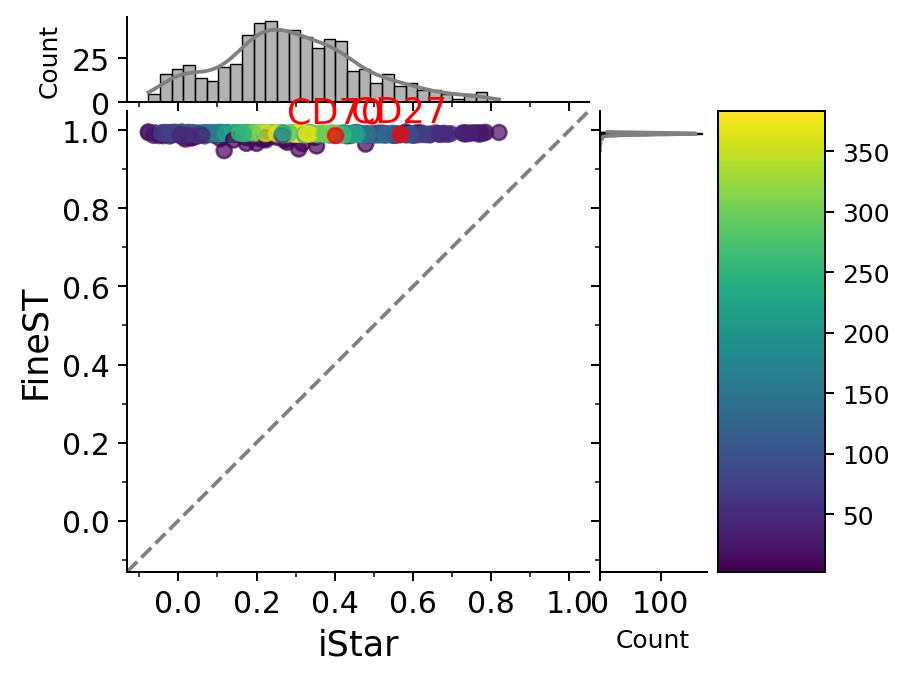

In [61]:
cor_FineST_Gene = cor_FineST_Gene.rename(columns={'Gene': 'Gene', 'correlation_coefficient': 'FineST'})
cor_iStar_Gene = cor_iStar_Gene.rename(columns={'Gene': 'Gene', 'correlation_coefficient': 'iStar'})

import os
os.chdir(str(path)+'FineST/FineST_local/Dataset/NPC/Compare')
fstplt.plot_PCC_revised(cor_FineST_Gene, cor_iStar_Gene, 'Gene', 'iStar', 'FineST', 
                                gene_set=['CD70', 'CD27'], title='Gene cor: FineST vs iStar', fig_size=(5, 4), 
                                trans=True,  format='svg', 
                                # save_path=None)
                                save_path='gene_cor_FineST_iStar_subspot.svg')
                                # save_path='gene_cor_FineST_iStar_subspot_scale.svg')

In [62]:
#############################
# PCC: NPC-sc
#############################
os.chdir(str(path)+'iSTAR/istar-master/data/NPC1/')
cor_iStar_Gene = pd.read_csv('cor_iStar_Gene.csv')
print(cor_iStar_Gene.head())

os.chdir(str(path)+'FineST/FineST_local/Dataset/NPC/Compare')
# cor_FineST_Gene = pd.read_csv('cor_FineST_Gene_sc_virchow2.csv')
cor_FineST_Gene = pd.read_csv('cor_FineST_Gene_sc_virchow2_scale.csv')
print(cor_FineST_Gene.head())

   Unnamed: 0    Gene  correlation_coefficient       p_value
0           0   TGFB1                 0.471325  1.469319e-74
1           1  TGFBR1                 0.252077  9.717614e-21
2           2  TGFBR2                 0.507945  3.263178e-88
3           3   TGFB2                 0.143345  1.505617e-07
4           4   TGFB3                 0.226935  5.245727e-17
   Unnamed: 0    Gene  correlation_coefficient  p_value
0           0   TGFB1                 0.942973      0.0
1           1  TGFBR1                 0.962707      0.0
2           2  TGFBR2                 0.956862      0.0
3           3   TGFB2                 0.929095      0.0
4           4   TGFB3                 0.963493      0.0


In [63]:
print(cor_FineST_Gene)
print(cor_iStar_Gene)

print(cor_FineST_Gene[cor_FineST_Gene['Gene']=='BMP2'])
print(cor_iStar_Gene[cor_iStar_Gene['Gene']=='BMP2'])
print(cor_FineST_Gene['correlation_coefficient'].mean(), cor_iStar_Gene['correlation_coefficient'].mean())

     Unnamed: 0     Gene  correlation_coefficient  p_value
0             0    TGFB1                 0.942973      0.0
1             1   TGFBR1                 0.962707      0.0
2             2   TGFBR2                 0.956862      0.0
3             3    TGFB2                 0.929095      0.0
4             4    TGFB3                 0.963493      0.0
..          ...      ...                      ...      ...
591         591   PLXNC1                 0.972907      0.0
592         592  SIGLEC1                 0.980521      0.0
593         593     THY1                 0.954049      0.0
594         594    VCAM1                 0.973015      0.0
595         595     VSIR                 0.953828      0.0

[596 rows x 4 columns]
     Unnamed: 0     Gene  correlation_coefficient       p_value
0             0    TGFB1                 0.471325  1.469319e-74
1             1   TGFBR1                 0.252077  9.717614e-21
2             2   TGFBR2                 0.507945  3.263178e-88
3           

merged_df: (596, 7)


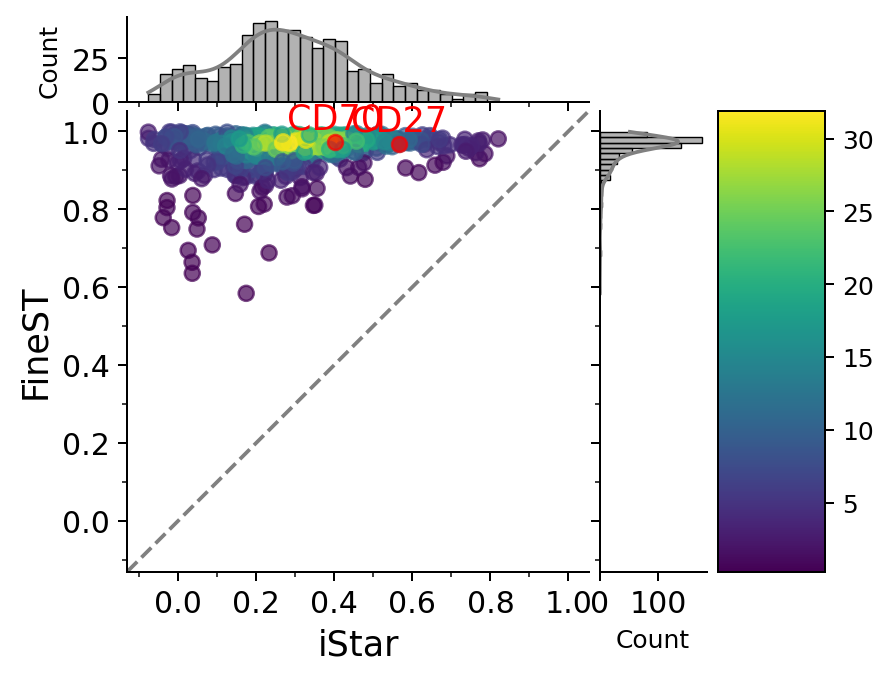

In [64]:
cor_FineST_Gene = cor_FineST_Gene.rename(columns={'Gene': 'Gene', 'correlation_coefficient': 'FineST'})
cor_iStar_Gene = cor_iStar_Gene.rename(columns={'Gene': 'Gene', 'correlation_coefficient': 'iStar'})

import os
os.chdir(str(path)+'FineST/FineST_local/Dataset/NPC/Compare')
fstplt.plot_PCC_revised(cor_FineST_Gene, cor_iStar_Gene, 'Gene', 'iStar', 'FineST', 
                                gene_set=['CD70', 'CD27'], title='Gene cor: FineST vs iStar', fig_size=(5, 4), 
                                trans=True,  format='svg', 
                                # save_path=None)
                                save_path='gene_cor_FineST_iStar_sc.svg')
                                # save_path='gene_cor_FineST_iStar_sc_scale.svg')

In [5]:
#################
# TESLA
# The old ‘cor_TESLA_Gene.csv’ from 'https://localhost:8889/notebooks/TESLA/TESLA/tutorial/tutorial_lly_NPC1.ipynb' is wrong
# The ‘cor_TESLA_Gene_250217.csv’ is right
#################

#############################
# PCC: NPC-subspot
#############################
patientxy = 'patient1'
os.chdir(str(path)+'TESLA/TESLA/Data/'+str(patientxy)+'/')
cor_iStar_Gene = pd.read_csv('cor_TESLA_Gene_250217.csv')
print(cor_iStar_Gene.head())

os.chdir(str(path)+'FineST/FineST_local/Dataset/NPC/Compare')
cor_FineST_Gene = pd.read_csv('cor_FineST_Gene_subspot_virchow2.csv')
# cor_FineST_Gene = pd.read_csv('cor_FineST_Gene_subspot_virchow2_scale.csv')
print(cor_FineST_Gene.head())

   Unnamed: 0    Gene  correlation_coefficient       p_value
0           0   TGFB1                 0.358919  1.032107e-41
1           1  TGFBR1                 0.252570  8.406409e-21
2           2  TGFBR2                 0.429625  7.310441e-61
3           3   TGFB2                 0.141996  1.992987e-07
4           4   TGFB3                 0.137229  5.068195e-07
   Unnamed: 0    Gene  correlation_coefficient  p_value
0           0   TGFB1                 0.990140      0.0
1           1  TGFBR1                 0.991210      0.0
2           2  TGFBR2                 0.991918      0.0
3           3   TGFB2                 0.990185      0.0
4           4   TGFB3                 0.992074      0.0


In [6]:
print(cor_FineST_Gene[cor_FineST_Gene['Gene']=='BMP2'])
print(cor_iStar_Gene[cor_iStar_Gene['Gene']=='BMP2'])
print(cor_FineST_Gene['correlation_coefficient'].mean(), cor_iStar_Gene['correlation_coefficient'].mean())

   Unnamed: 0  Gene  correlation_coefficient  p_value
8           8  BMP2                  0.98976      0.0
   Unnamed: 0  Gene  correlation_coefficient       p_value
8           8  BMP2                 0.193201  1.191872e-12
0.9906692999037703 0.24918124603741226


merged_df: (596, 7)


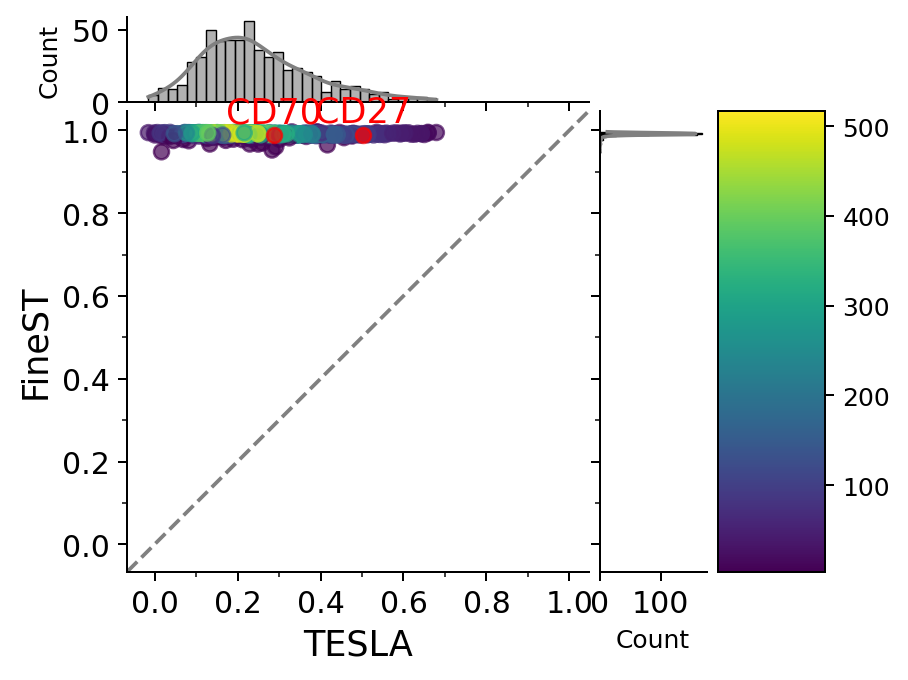

In [9]:
cor_FineST_Gene = cor_FineST_Gene.rename(columns={'Gene': 'Gene', 'correlation_coefficient': 'FineST'})
cor_iStar_Gene = cor_iStar_Gene.rename(columns={'Gene': 'Gene', 'correlation_coefficient': 'TESLA'})

import os
os.chdir(str(path)+'FineST/FineST_local/Dataset/NPC/Compare')
fstplt.plot_PCC_revised(cor_FineST_Gene, cor_iStar_Gene, 'Gene', 'TESLA', 'FineST', 
                                gene_set=['CD70', 'CD27'], title='Gene cor: FineST vs TESLA', fig_size=(5, 4), 
                                trans=True,  format='svg', 
                                # save_path=None)
                                save_path='gene_cor_FineST_TESLA_subspot_250217.svg')
                                # save_path='gene_cor_FineST_TESLA_subspot_scale.svg')

In [11]:
#############################
# PCC: NPC-subspot
#############################
patientxy = 'patient1'
os.chdir(str(path)+'TESLA/TESLA/Data/'+str(patientxy)+'/')
cor_iStar_Gene = pd.read_csv('cor_TESLA_Gene_250217.csv')
print(cor_iStar_Gene.head())

os.chdir(str(path)+'FineST/FineST_local/Dataset/NPC/Compare')
cor_FineST_Gene = pd.read_csv('cor_FineST_Gene_sc_virchow2.csv')
# cor_FineST_Gene = pd.read_csv('cor_FineST_Gene_sc_virchow2_scale.csv')
print(cor_FineST_Gene.head())

   Unnamed: 0    Gene  correlation_coefficient       p_value
0           0   TGFB1                 0.358919  1.032107e-41
1           1  TGFBR1                 0.252570  8.406409e-21
2           2  TGFBR2                 0.429625  7.310441e-61
3           3   TGFB2                 0.141996  1.992987e-07
4           4   TGFB3                 0.137229  5.068195e-07
   Unnamed: 0    Gene  correlation_coefficient  p_value
0           0   TGFB1                 0.942973      0.0
1           1  TGFBR1                 0.962707      0.0
2           2  TGFBR2                 0.956862      0.0
3           3   TGFB2                 0.929095      0.0
4           4   TGFB3                 0.963493      0.0


In [12]:
print(cor_FineST_Gene[cor_FineST_Gene['Gene']=='BMP2'])
print(cor_iStar_Gene[cor_iStar_Gene['Gene']=='BMP2'])
print(cor_FineST_Gene['correlation_coefficient'].mean(), cor_iStar_Gene['correlation_coefficient'].mean())

   Unnamed: 0  Gene  correlation_coefficient  p_value
8           8  BMP2                  0.98833      0.0
   Unnamed: 0  Gene  correlation_coefficient       p_value
8           8  BMP2                 0.193201  1.191872e-12
0.9519392110779029 0.24918124603741226


merged_df: (596, 7)


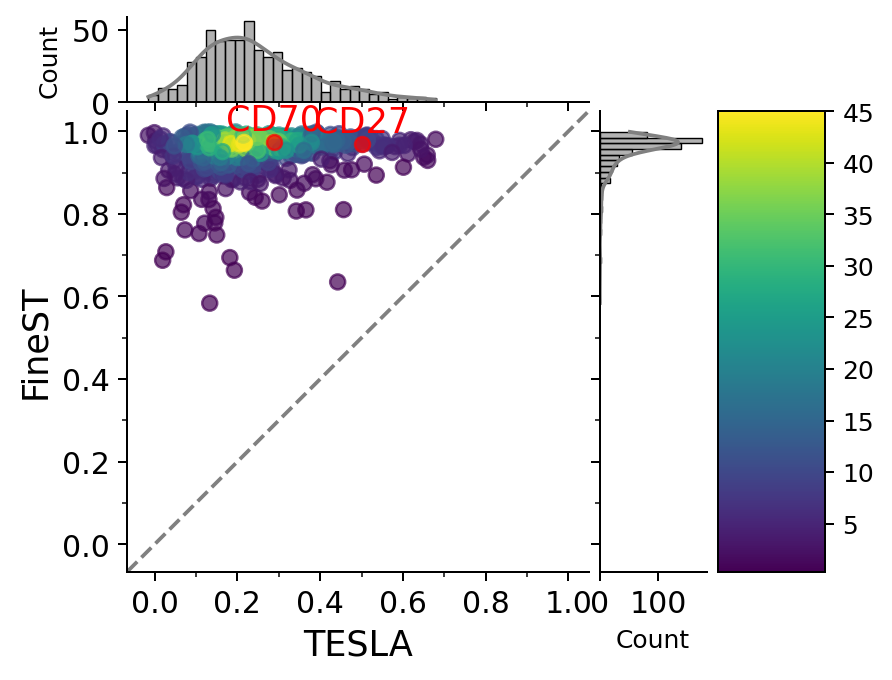

In [13]:
cor_FineST_Gene = cor_FineST_Gene.rename(columns={'Gene': 'Gene', 'correlation_coefficient': 'FineST'})
cor_iStar_Gene = cor_iStar_Gene.rename(columns={'Gene': 'Gene', 'correlation_coefficient': 'TESLA'})

import os
os.chdir(str(path)+'FineST/FineST_local/Dataset/NPC/Compare')
fstplt.plot_PCC_revised(cor_FineST_Gene, cor_iStar_Gene, 'Gene', 'TESLA', 'FineST', 
                                gene_set=['CD70', 'CD27'], title='Gene cor: FineST vs TESLA', fig_size=(5, 4), 
                                trans=True,  format='svg', 
                                # save_path=None)
                                save_path='gene_cor_FineST_TESLA_sc_250217.svg')
                                # save_path='gene_cor_FineST_TESLA_sc_scale.svg')

**2.4 Plot SSIM**

In [65]:
###############
# iStar
###############

#############################
# SSIM: NPC-subspot
#############################
patientxy = 'patient1'
os.chdir(str(path)+'NPC/Data/stdata/ImputData/'+str(patientxy))
# ssim_FineST = pd.read_csv('SSIM_FineST_sc.csv')
ssim_iStar = pd.read_csv('SSIM_iStar.csv')
# ssim_iStar = pd.read_csv('SSIM_iStar_update.csv')
print(ssim_iStar['iStarSSIM16um'].mean())
print(ssim_iStar.head())

os.chdir(str(path)+'FineST/FineST_local/Dataset/NPC/Compare')
ssim_FineST = pd.read_csv("SSIM_FineST_subspot.csv")   
# ssim_FineST = pd.read_csv("SSIM_FineST_subspot_scale.csv")   
print(ssim_FineST['FineSTSSIM_subspot'].mean())
print(ssim_FineST.head())

0.5634240650780796
  Unnamed: 0  iStarSSIM16um
0      TGFB1       0.352774
1     TGFBR1       0.401161
2     TGFBR2       0.390054
3      TGFB2       0.829064
4      TGFB3       0.511379
0.8578133645768989
  Unnamed: 0  FineSTSSIM_subspot
0      TGFB1            0.774207
1     TGFBR1            0.805635
2     TGFBR2            0.793326
3      TGFB2            0.923357
4      TGFB3            0.833290


In [66]:
print(ssim_iStar['iStarSSIM16um'].mean())
print(ssim_FineST['FineSTSSIM_subspot'].mean())

0.5634240650780796
0.8578133645768989


merged_df: (596, 3)


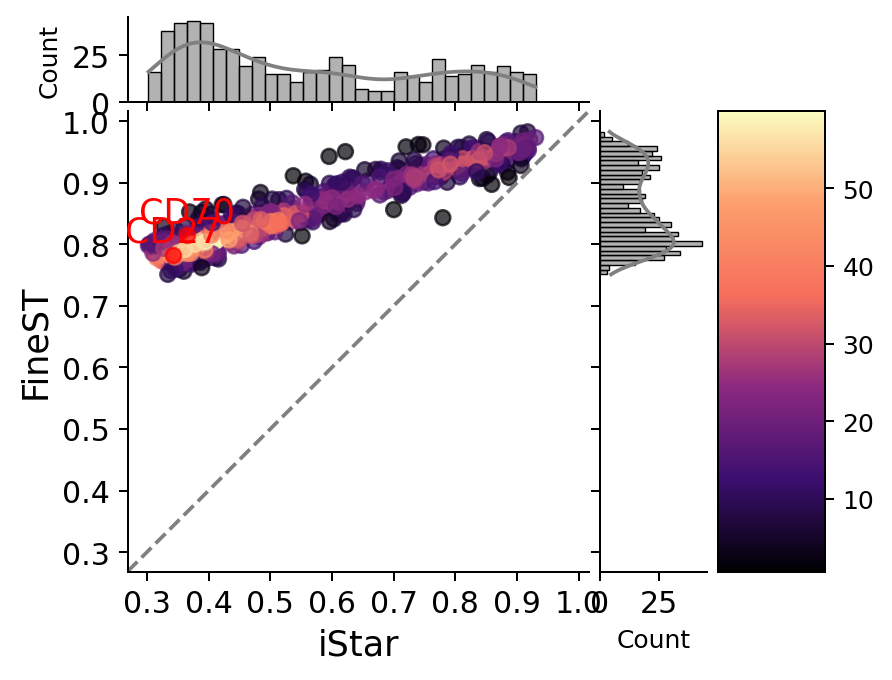

In [67]:
ssim_FineST = ssim_FineST.rename(columns={'Unnamed: 0': 'Gene', 'FineSTSSIM_subspot': 'FineST'})
ssim_iStar = ssim_iStar.rename(columns={'Unnamed: 0': 'Gene', 'iStarSSIM16um': 'iStar'})

patientxy = 'NPC'
os.chdir(str(path)+'FineST/FineST_local/Dataset/'+str(patientxy)+'/Compare/')
fstplt.plot_SSIM_revised(ssim_FineST, ssim_iStar, 'Gene', 'iStar', 'FineST', 
                         gene_set=['CD70', 'CD27'], title='Gene SSIM: FineST vs iStar', 
                         max_step=0.1, min_step=0.1, fig_size=(5, 4), trans=True, format='svg', 
                         # save_path=None)
                         save_path="gene_ssim_FineST_iStar_subspot.svg")
                         # save_path="gene_ssim_FineST_iStar_subspot_scale.svg")

In [68]:
#############################
# SSIM: NPC-subspot
#############################
patientxy = 'patient1'
os.chdir(str(path)+'NPC/Data/stdata/ImputData/'+str(patientxy))
# ssim_FineST = pd.read_csv('SSIM_FineST_sc.csv')
ssim_iStar = pd.read_csv('SSIM_iStar.csv')
# ssim_iStar = pd.read_csv('SSIM_iStar_update.csv')
print(ssim_iStar.head())

os.chdir(str(path)+'FineST/FineST_local/Dataset/NPC/Compare')
ssim_FineST = pd.read_csv("SSIM_FineST_sc.csv") 
# ssim_FineST = pd.read_csv("SSIM_FineST_sc_scale.csv")   
print(ssim_FineST.head())

  Unnamed: 0  iStarSSIM16um
0      TGFB1       0.352774
1     TGFBR1       0.401161
2     TGFBR2       0.390054
3      TGFB2       0.829064
4      TGFB3       0.511379
  Unnamed: 0  FineSTSSIM_sc
0      TGFB1       0.840480
1     TGFBR1       0.842002
2     TGFBR2       0.805881
3      TGFB2       0.700201
4      TGFB3       0.771334


In [69]:
print(ssim_iStar['iStarSSIM16um'].mean())
print(ssim_FineST['FineSTSSIM_sc'].mean())

0.5634240650780796
0.8529671385066271


merged_df: (596, 3)


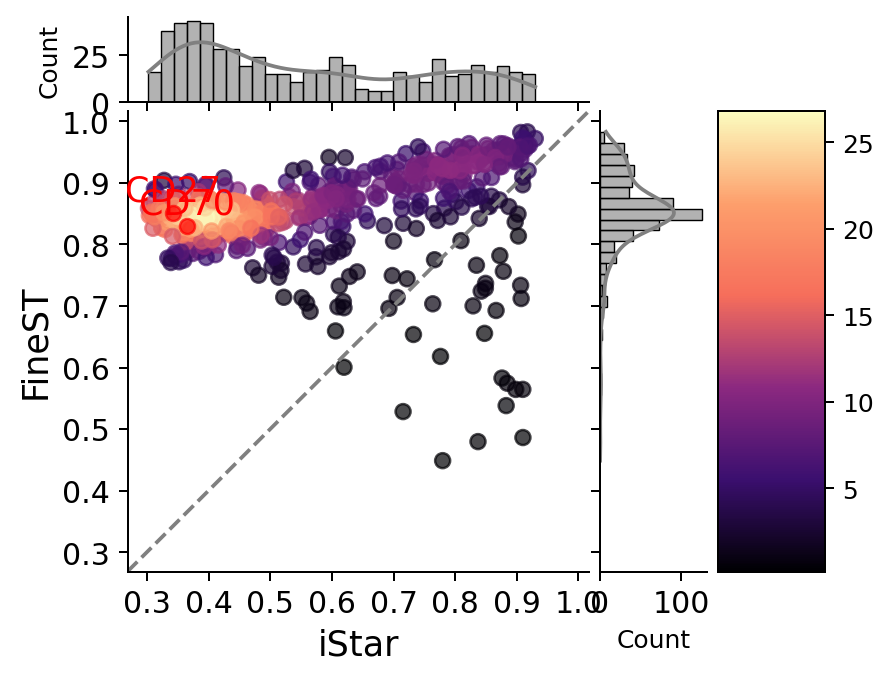

In [70]:
ssim_FineST = ssim_FineST.rename(columns={'Unnamed: 0': 'Gene', 'FineSTSSIM_sc': 'FineST'})
ssim_iStar = ssim_iStar.rename(columns={'Unnamed: 0': 'Gene', 'iStarSSIM16um': 'iStar'})

patientxy = 'NPC'
os.chdir(str(path)+'FineST/FineST_local/Dataset/'+str(patientxy)+'/Compare/')
fstplt.plot_SSIM_revised(ssim_FineST, ssim_iStar, 'Gene', 'iStar', 'FineST', 
                         gene_set=['CD70', 'CD27'], title='Gene SSIM: FineST vs iStar', 
                         max_step=0.1, min_step=0.1, fig_size=(5, 4), trans=True, format='svg', 
                         # save_path=None)
                         save_path="gene_ssim_FineST_iStar_sc.svg")
                         # save_path="gene_ssim_FineST_iStar_sc_scale.svg")

In [6]:
###############
# TESLA
###############

#############################
# SSIM: NPC-subspot
#############################
patientxy = 'patient1'
os.chdir(str(path)+'TESLA/TESLA/Data/'+str(patientxy)+'/')
ssim_iStar = pd.read_csv('SSIM_TESLA_250217.csv')
# ssim_iStar = pd.read_csv('SSIM_TESLA_update.csv')
print(ssim_iStar.head())

os.chdir(str(path)+'FineST/FineST_local/Dataset/NPC/Compare')
ssim_FineST = pd.read_csv("SSIM_FineST_subspot.csv")   
# ssim_FineST = pd.read_csv("SSIM_FineST_subspot_scale.csv")   
print(ssim_FineST.head())

  Unnamed: 0  TESLASSIMsubspot
0      TGFB1          0.583587
1     TGFBR1          0.562936
2     TGFBR2          0.612819
3      TGFB2          0.633405
4      TGFB3          0.503375
  Unnamed: 0  FineSTSSIM_subspot
0      TGFB1            0.774207
1     TGFBR1            0.805635
2     TGFBR2            0.793326
3      TGFB2            0.923357
4      TGFB3            0.833290


In [7]:
print(ssim_iStar['TESLASSIMsubspot'].mean())
print(ssim_FineST['FineSTSSIM_subspot'].mean())

0.6219778527876849
0.8578133645768989


In [8]:
ssim_FineST = ssim_FineST.rename(columns={'Unnamed: 0': 'Gene', 'FineSTSSIM_subspot': 'FineST'})
ssim_iStar = ssim_iStar.rename(columns={'Unnamed: 0': 'Gene', 'TESLASSIMsubspot': 'TESLA'})

merged_df: (596, 3)


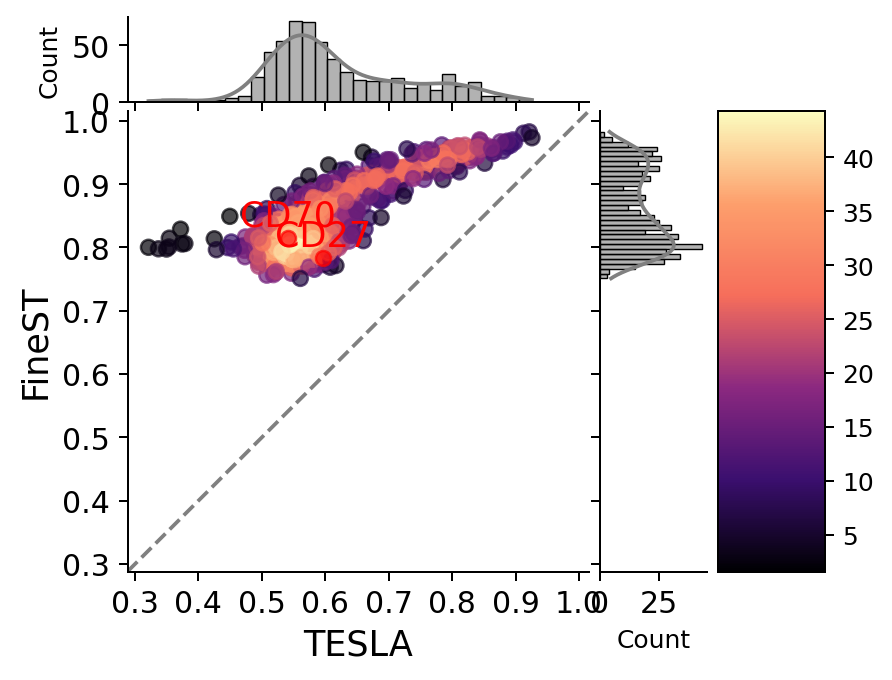

In [9]:
os.chdir(str(path)+'FineST/FineST_local/Dataset/NPC/Compare/')
fstplt.plot_SSIM_revised(ssim_FineST, ssim_iStar, 'Gene', 'TESLA', 'FineST', 
                         gene_set=['CD70', 'CD27'], title='Gene SSIM: FineST vs TESLA', 
                         max_step=0.1, min_step=0.1, fig_size=(5, 4), trans=True, format='svg', 
                         # save_path=None)
                         save_path="gene_ssim_FineST_TESLA_subspot_250217.svg")
                         # save_path="gene_ssim_FineST_TESLA_subspot_scale.svg")

In [10]:
#############################
# SSIM: NPC-sc
#############################
patientxy = 'patient1'
os.chdir(str(path)+'TESLA/TESLA/Data/'+str(patientxy)+'/')
ssim_iStar = pd.read_csv('SSIM_TESLA_250217.csv')
# ssim_iStar = pd.read_csv('SSIM_TESLA_update.csv')
print(ssim_iStar.head())

os.chdir(str(path)+'FineST/FineST_local/Dataset/NPC/Compare')
ssim_FineST = pd.read_csv("SSIM_FineST_sc.csv")   
# ssim_FineST = pd.read_csv("SSIM_FineST_subspot_scale.csv")   
print(ssim_FineST.head())

  Unnamed: 0  TESLASSIMsubspot
0      TGFB1          0.583587
1     TGFBR1          0.562936
2     TGFBR2          0.612819
3      TGFB2          0.633405
4      TGFB3          0.503375
  Unnamed: 0  FineSTSSIM_sc
0      TGFB1       0.840480
1     TGFBR1       0.842002
2     TGFBR2       0.805881
3      TGFB2       0.700201
4      TGFB3       0.771334


In [11]:
print(ssim_iStar['TESLASSIMsubspot'].mean())
print(ssim_FineST['FineSTSSIM_sc'].mean())

0.6219778527876849
0.8529671385066271


In [12]:
ssim_FineST = ssim_FineST.rename(columns={'Unnamed: 0': 'Gene', 'FineSTSSIM_sc': 'FineST'})
ssim_iStar = ssim_iStar.rename(columns={'Unnamed: 0': 'Gene', 'TESLASSIMsubspot': 'TESLA'})

merged_df: (596, 3)


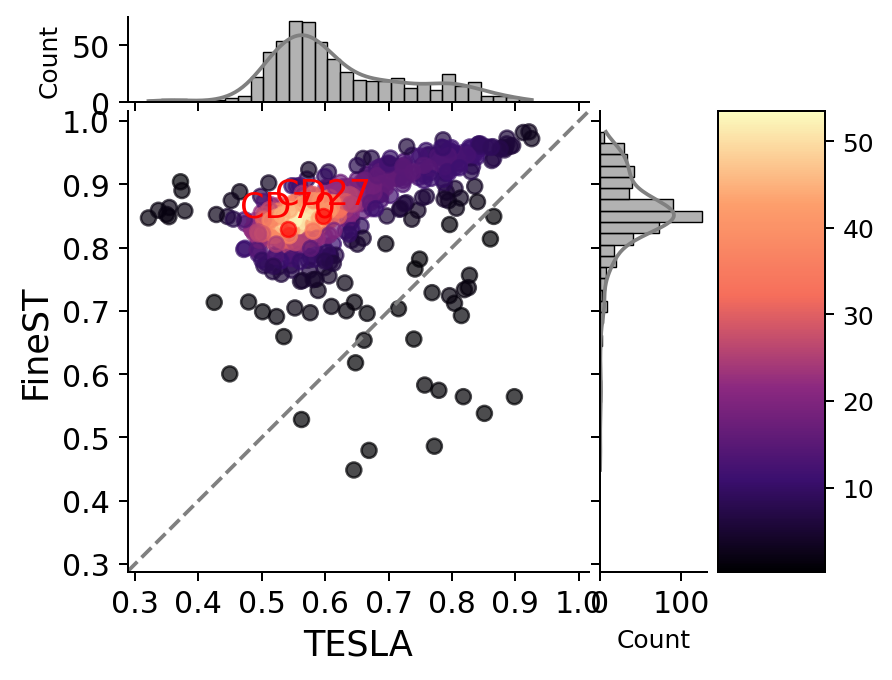

In [13]:
os.chdir(str(path)+'FineST/FineST_local/Dataset/NPC/Compare/')
fstplt.plot_SSIM_revised(ssim_FineST, ssim_iStar, 'Gene', 'TESLA', 'FineST', 
                         gene_set=['CD70', 'CD27'], title='Gene SSIM: FineST vs TESLA', 
                         max_step=0.1, min_step=0.1, fig_size=(5, 4), trans=True, format='svg', 
                         # save_path=None)
                         save_path="gene_ssim_FineST_TESLA_sc_250217.svg")
                         # save_path="gene_ssim_FineST_TESLA_sc_scale.svg")

## 3. ROI and Rec. region: cell type prediction

**3.1 ROI region**

In [3]:
import os
# path = '/Users/lilingyu/E/PhD/Python/'
# path = '/storage3/yhhuang/users/lingyu/'
# path = '/data/users/lingyu/'
# path = '/home/lly/Python/'
path = '/mnt/lingyu/nfs_share2/Python/'

In [15]:
## Load data
import os
import numpy as np
import pandas as pd
os.chdir(str(path)+'VisiumHD/Dataset/Colon_Cancer/ResultsROIs')

celltype_xeniumgt_ROIall = pd.read_csv('ROIs_celltype_prop/prop_ROIall.csv') 
celltype_xeniumgt_ROI1 = pd.read_csv('ROIs_celltype_prop/prop_ROI1.csv') 
celltype_xeniumgt_ROI2 = pd.read_csv('ROIs_celltype_prop/prop_ROI2.csv')
celltype_xeniumgt_ROI3 = pd.read_csv('ROIs_celltype_prop/prop_ROI3.csv')
celltype_xeniumgt_ROI4 = pd.read_csv('ROIs_celltype_prop/prop_ROI4.csv')

celltype_Visiumspot_ROIall = pd.read_csv('celltype_prop_CRC16_iStar_ROIall.csv', index_col=0)
celltype_Visiumspot_ROI1 = pd.read_csv('celltype_prop_CRC16_iStar_ROI1.csv', index_col=0)
celltype_Visiumspot_ROI2 = pd.read_csv('celltype_prop_CRC16_iStar_ROI2.csv', index_col=0)
celltype_Visiumspot_ROI3 = pd.read_csv('celltype_prop_CRC16_iStar_ROI3.csv', index_col=0)
celltype_Visiumspot_ROI4 = pd.read_csv('celltype_prop_CRC16_iStar_ROI4.csv', index_col=0)

os.chdir(str(path)+'FineST/FineST_local/Dataset/CRC16um/TransImp/')
celltype_TransImpsc_ROIall = pd.read_csv('celltype_prop_CRC16_FineST_ROIall.csv', index_col=0) 
os.chdir(str(path)+'FineST/FineST_local/Dataset/CRC16um/TransImp/ResultsROIs')
celltype_TransImpsc_ROI1 = pd.read_csv('celltype_prop_CRC16_FineST_ROI1.csv', index_col=0) 
celltype_TransImpsc_ROI2 = pd.read_csv('celltype_prop_CRC16_FineST_ROI2.csv', index_col=0)
celltype_TransImpsc_ROI3 = pd.read_csv('celltype_prop_CRC16_FineST_ROI3.csv', index_col=0)
celltype_TransImpsc_ROI4 = pd.read_csv('celltype_prop_CRC16_FineST_ROI4.csv', index_col=0)

In [16]:
celltype_xeniumgt_ROIall

,Adipocyte,CAF,CD4 T cell,CD8 Cytotoxic T cell,Endothelial,Enteric Glial,Enterocyte,Epithelial,Fibroblast,Goblet,...,QC_Filtered,SM Stress Response,Smooth Muscle,Tuft,Tumor I,Tumor II,Tumor III,Tumor V,Unknown III (SM),vSM
0,0.000547,0.135634,0.003315,0.002358,0.03703,0.001435,0.021451,0.000473,0.007712,0.048667,...,0.000353,0.000074,0.000148,0.000068,0.002164,0.001794,0.338105,0.000216,0.001475,0.04456


In [17]:
celltype_TransImpsc_ROIall

,Tumor III,CAF,Goblet,Tumor V,QC_Filtered,vSM,Tumor I,Endothelial,Neutrophil,Enterocyte,...,Mast,Macrophage,CD4 T cell,Smooth Muscle,Unknown III (SM),mRegDC,Adipocyte,Neuroendocrine,Tuft,pDC
CRC16_TransImp_FineST,0.138623,0.110161,0.075244,0.062912,0.054734,0.052718,0.049119,0.039736,0.036246,0.034296,...,0.014136,0.013669,0.010807,0.008755,0.007375,0.005929,0.005024,0.004761,0.002724,0.00111


In [18]:
celltype_Visiumspot_ROIall

,Tumor III,CAF,vSM,SM Stress Response,QC_Filtered,Fibroblast,Tumor V,Lymphatic Endothelial,Goblet,Neutrophil,...,Myofibroblast,Unknown III (SM),Smooth Muscle,Neuroendocrine,CD8 Cytotoxic T cell,CD4 T cell,Mast,Adipocyte,Enteric Glial,mRegDC
NPC1_TransImp,0.104312,0.103472,0.079605,0.064516,0.063363,0.054418,0.053155,0.048208,0.044677,0.036578,...,0.01185,0.011295,0.010952,0.010449,0.00907,0.009048,0.008311,0.001686,0.001087,0.000671


In [19]:
from scipy.stats import entropy
from numpy.linalg import norm
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def JSD(P, Q):
    _P = P / norm(P, ord=1)
    _Q = Q / norm(Q, ord=1)
    _M = 0.5 * (_P + _Q)
    return 0.5 * (entropy(_P, _M) + entropy(_Q, _M))

def calculate_corr_and_jsd(data1, data2, data3):
    # 删除data1的"Unlabeled"列
    # data1 = data1.drop(columns=["Unlabeled"])
    # # 对data1进行归一化处理，使得所有列的和为1
    # data1 = data1.div(data1.sum(axis=1), axis=0)
    cols_data1 = data1.columns
    
    # 为data2和data3数据重排列，并填充缺失值
    data2 = data2.reindex(columns=cols_data1, fill_value=0)
    data3 = data3.reindex(columns=cols_data1, fill_value=0)

    # 计算相关性
    corr_data1_data2 = np.corrcoef(data1.values, data2.values)[0, 1]
    corr_data1_data3 = np.corrcoef(data1.values, data3.values)[0, 1]
    
    # 计算JSD
    jsd_data1_data2 = JSD(data1.values.flatten(), data2.values.flatten())
    jsd_data1_data3 = JSD(data1.values.flatten(), data3.values.flatten())

    # 计算余弦相似度
    cosine_data1_data2 = cosine_similarity(data1.values.reshape(1, -1), data2.values.reshape(1, -1))[0, 0]
    cosine_data1_data3 = cosine_similarity(data1.values.reshape(1, -1), data3.values.reshape(1, -1))[0, 0]

    return corr_data1_data2, corr_data1_data3, jsd_data1_data2, jsd_data1_data3, cosine_data1_data2, cosine_data1_data3

In [20]:
(corr_TransImpsc_ROIall, corr_Visiumspot_ROIall, 
 jsd_TransImpsc_ROIall, jsd_Visiumspot_ROIall, 
 cosine_TransImpsc_ROIall, cosine_Visiumspot_ROIall) = calculate_corr_and_jsd(celltype_xeniumgt_ROIall, 
                                                                          celltype_TransImpsc_ROIall, 
                                                                          celltype_Visiumspot_ROIall)

print("Correlation between xeniumgt and TransImpsc: ", corr_TransImpsc_ROIall)
print("Correlation between xeniumgt and Visiumspot: ", corr_Visiumspot_ROIall)
print("JSD between xeniumgt and TransImpsc: ", jsd_TransImpsc_ROIall)
print("JSD between xeniumgt and Visiumspot: ", jsd_Visiumspot_ROIall)
print("cosine between xeniumgt and TransImpsc: ", cosine_TransImpsc_ROIall)
print("cosine between xeniumgt and Visiumspot: ", cosine_Visiumspot_ROIall)

Correlation between xeniumgt and TransImpsc:  0.8191311805510573
Correlation between xeniumgt and Visiumspot:  0.6700992427056732
JSD between xeniumgt and TransImpsc:  0.17292153920721828
JSD between xeniumgt and Visiumspot:  0.2144880399587559
cosine between xeniumgt and TransImpsc:  0.7815326195810239
cosine between xeniumgt and Visiumspot:  0.6710129330975301


In [21]:
(corr_TransImpsc_ROI1, corr_Visiumspot_ROI1, 
 jsd_TransImpsc_ROI1, jsd_Visiumspot_ROI1, 
 cosine_TransImpsc_ROI1, cosine_Visiumspot_ROI1) = calculate_corr_and_jsd(celltype_xeniumgt_ROI1, 
                                                                          celltype_TransImpsc_ROI1, 
                                                                          celltype_Visiumspot_ROI1)

print("Correlation between xeniumgt and TransImpsc: ", corr_TransImpsc_ROI1)
print("Correlation between xeniumgt and Visiumspot: ", corr_Visiumspot_ROI1)
print("JSD between xeniumgt and TransImpsc: ", jsd_TransImpsc_ROI1)
print("JSD between xeniumgt and Visiumspot: ", jsd_Visiumspot_ROI1)
print("cosine between xeniumgt and TransImpsc: ", cosine_TransImpsc_ROI1)
print("cosine between xeniumgt and Visiumspot: ", cosine_Visiumspot_ROI1)

Correlation between xeniumgt and TransImpsc:  0.963301424130624
Correlation between xeniumgt and Visiumspot:  0.9361100698414635
JSD between xeniumgt and TransImpsc:  0.10654435851941159
JSD between xeniumgt and Visiumspot:  0.16374776990327944
cosine between xeniumgt and TransImpsc:  0.9651344251449906
cosine between xeniumgt and Visiumspot:  0.9391141793186456


In [22]:
(corr_TransImpsc_ROI2, corr_Visiumspot_ROI2, 
 jsd_TransImpsc_ROI2, jsd_Visiumspot_ROI2, 
 cosine_TransImpsc_ROI2, cosine_Visiumspot_ROI2) = calculate_corr_and_jsd(celltype_xeniumgt_ROI2, 
                                                                          celltype_TransImpsc_ROI2, 
                                                                          celltype_Visiumspot_ROI2)

print("Correlation between xeniumgt and TransImpsc: ", corr_TransImpsc_ROI2)
print("Correlation between xeniumgt and Visiumspot: ", corr_Visiumspot_ROI2)
print("JSD between xeniumgt and TransImpsc: ", jsd_TransImpsc_ROI2)
print("JSD between xeniumgt and Visiumspot: ", jsd_Visiumspot_ROI2)
print("cosine between xeniumgt and TransImpsc: ", cosine_TransImpsc_ROI2)
print("cosine between xeniumgt and Visiumspot: ", cosine_Visiumspot_ROI2)

Correlation between xeniumgt and TransImpsc:  0.8738507415609102
Correlation between xeniumgt and Visiumspot:  0.7272973252775756
JSD between xeniumgt and TransImpsc:  0.2832858504656862
JSD between xeniumgt and Visiumspot:  0.3728085333015232
cosine between xeniumgt and TransImpsc:  0.8542380240993024
cosine between xeniumgt and Visiumspot:  0.6957254048267726


In [23]:
(corr_TransImpsc_ROI3, corr_Visiumspot_ROI3, 
 jsd_TransImpsc_ROI3, jsd_Visiumspot_ROI3, 
 cosine_TransImpsc_ROI3, cosine_Visiumspot_ROI3) = calculate_corr_and_jsd(celltype_xeniumgt_ROI3, 
                                                                          celltype_TransImpsc_ROI3, 
                                                                          celltype_Visiumspot_ROI3)

print("Correlation between xeniumgt and TransImpsc: ", corr_TransImpsc_ROI3)
print("Correlation between xeniumgt and Visiumspot: ", corr_Visiumspot_ROI3)
print("JSD between xeniumgt and TransImpsc: ", jsd_TransImpsc_ROI3)
print("JSD between xeniumgt and Visiumspot: ", jsd_Visiumspot_ROI3)
print("cosine between xeniumgt and TransImpsc: ", cosine_TransImpsc_ROI3)
print("cosine between xeniumgt and Visiumspot: ", cosine_Visiumspot_ROI3)

Correlation between xeniumgt and TransImpsc:  0.9202696552789797
Correlation between xeniumgt and Visiumspot:  0.6014743684012649
JSD between xeniumgt and TransImpsc:  0.11559947930722975
JSD between xeniumgt and Visiumspot:  0.21254790137784174
cosine between xeniumgt and TransImpsc:  0.9192439732309692
cosine between xeniumgt and Visiumspot:  0.6723500884150728


In [24]:
(corr_TransImpsc_ROI4, corr_Visiumspot_ROI4, 
 jsd_TransImpsc_ROI4, jsd_Visiumspot_ROI4, 
 cosine_TransImpsc_ROI4, cosine_Visiumspot_ROI4) = calculate_corr_and_jsd(celltype_xeniumgt_ROI4, 
                                                                          celltype_TransImpsc_ROI4, 
                                                                          celltype_Visiumspot_ROI4)

print("Correlation between xeniumgt and TransImpsc: ", corr_TransImpsc_ROI4)
print("Correlation between xeniumgt and Visiumspot: ", corr_Visiumspot_ROI4)
print("JSD between xeniumgt and TransImpsc: ", jsd_TransImpsc_ROI4)
print("JSD between xeniumgt and Visiumspot: ", jsd_Visiumspot_ROI4)
print("cosine between xeniumgt and TransImpsc: ", cosine_TransImpsc_ROI4)
print("cosine between xeniumgt and Visiumspot: ", cosine_Visiumspot_ROI4)

Correlation between xeniumgt and TransImpsc:  0.948822249973233
Correlation between xeniumgt and Visiumspot:  0.82110079980518
JSD between xeniumgt and TransImpsc:  0.11855055139633308
JSD between xeniumgt and Visiumspot:  0.1999643483663684
cosine between xeniumgt and TransImpsc:  0.9481224223777068
cosine between xeniumgt and Visiumspot:  0.8366699204241635


In [25]:
corr_TransImpsc = [corr_TransImpsc_ROIall, corr_TransImpsc_ROI1, corr_TransImpsc_ROI2, corr_TransImpsc_ROI3, corr_TransImpsc_ROI4]  
corr_Visiumspot = [corr_Visiumspot_ROIall, corr_Visiumspot_ROI1, corr_Visiumspot_ROI2, corr_Visiumspot_ROI3, corr_Visiumspot_ROI4]

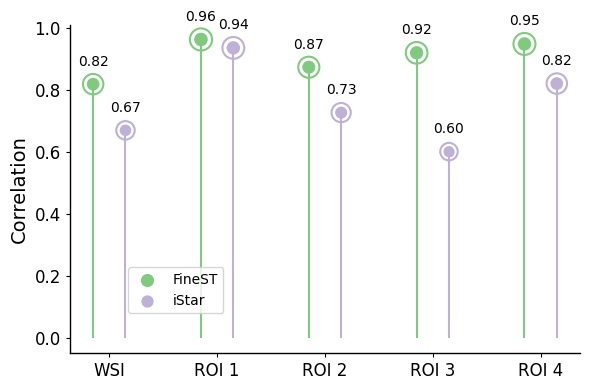

In [50]:
# 您已经计算了这些值，将这里的值替换为实际值
corr_TransImpsc = [corr_TransImpsc_ROIall, corr_TransImpsc_ROI1, corr_TransImpsc_ROI2, corr_TransImpsc_ROI3, corr_TransImpsc_ROI4]  
corr_Visiumspot = [corr_Visiumspot_ROIall, corr_Visiumspot_ROI1, corr_Visiumspot_ROI2, corr_Visiumspot_ROI3, corr_Visiumspot_ROI4]  

import matplotlib.pyplot as plt
import numpy as np

# 创建自定义图形大小
fig, ax = plt.subplots(figsize=(6, 4))

# 绘制茎叶图
x_pos = np.arange(len(corr_TransImpsc))
width = 0.3    # dist between two methods

_, stemline1, baseline1 = ax.stem(x_pos - width/2, corr_TransImpsc, linefmt="#80CA80", basefmt=" ", use_line_collection=True)
_, stemline2, baseline2 = ax.stem(x_pos + width/2, corr_Visiumspot, linefmt="#BFB0D5", basefmt=" ", use_line_collection=True)

# 设置茎的颜色
plt.setp(stemline1, 'color', '#80CA80')
plt.setp(stemline2, 'color', '#BFB0D5')

# 设置基线颜色为透明
plt.setp(baseline1, 'color', 'none')
plt.setp(baseline2, 'color', 'none')

# 绘制标记，标记的大小与纵轴值成比例
marker_size_factor = 80  # 你可以调整这个值来改变标记的大小
ax.scatter(x_pos - width/2, corr_TransImpsc, s=np.array(corr_TransImpsc) * marker_size_factor, color='#80CA80', label="FineST", zorder=3)
ax.scatter(x_pos + width/2, corr_Visiumspot, s=np.array(corr_Visiumspot) * marker_size_factor, color='#BFB0D5', label="iStar", zorder=3)

# 在每个点上添加一个圆环
ring_size_factor = 3.3  # 你可以调整这个值来改变圆环的大小
ax.scatter(x_pos - width/2, corr_TransImpsc, s=np.array(corr_TransImpsc) * marker_size_factor * ring_size_factor, facecolors='none', edgecolors='#80CA80', linewidths=1.5, zorder=4)
ax.scatter(x_pos + width/2, corr_Visiumspot, s=np.array(corr_Visiumspot) * marker_size_factor * ring_size_factor, facecolors='none', edgecolors='#BFB0D5', linewidths=1.5, zorder=4)

# 在每个点上添加纵轴数值，增加垂直偏移量以避免与圆点重叠
for i, txt in enumerate(corr_TransImpsc):
    ax.text(x_pos[i] - width/2, txt + 0.05, "{:.2f}".format(txt), ha='center', va='bottom')
for i, txt in enumerate(corr_Visiumspot):
    ax.text(x_pos[i] + width/2, txt + 0.05, "{:.2f}".format(txt), ha='center', va='bottom')
    
# 设置x轴标签
ax.set_xticks(x_pos)
ax.set_xticklabels(["WSI", "ROI 1", "ROI 2", "ROI 3", "ROI 4"], fontsize=12)

# 设置y轴标签
ax.set_ylabel("Correlation", fontsize=14)

# 设置标题
# ax.set_title("Cell type correlation across whole slide and four ROIs", fontsize=16)

# 设置图形边框样式
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_linewidth(1)
ax.spines["bottom"].set_linewidth(1)

# 设置刻度样式
ax.tick_params(axis="both", which="both", length=3, labelsize=12)

# 调整y轴刻度和网格线
ax.set_yticks(np.arange(0, 1.1, 0.2))  # 设置y轴刻度为0, 0.2, 0.4, ... 1.0

# 添加图例
ax.legend(loc=3, bbox_to_anchor=(0.1, 0.1))    # loc= "upper left", bbox_to_anchor=(1, 1)

# 显示图形
plt.tight_layout()
plt.savefig("cor_celltype_ROI_CRC16_ROI_4.pdf", dpi=300)
plt.show()

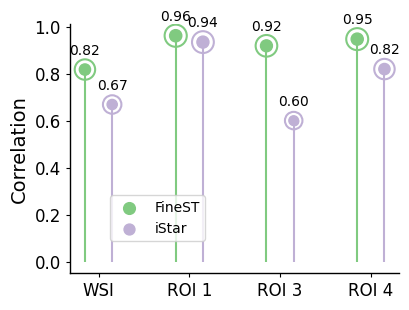

In [57]:
## 删除第 2个 RIO2
corr_TransImpsc = [corr_TransImpsc_ROIall, corr_TransImpsc_ROI1, corr_TransImpsc_ROI3, corr_TransImpsc_ROI4]  
corr_Visiumspot = [corr_Visiumspot_ROIall, corr_Visiumspot_ROI1, corr_Visiumspot_ROI3, corr_Visiumspot_ROI4]  


import matplotlib.pyplot as plt
import numpy as np


fig, ax = plt.subplots(figsize=(4.2, 3.5))    # for ROI
# fig, ax = plt.subplots(figsize=(4.0, 2.5))    # for Rec

# 绘制茎叶图
# x_pos = np.arange(len(corr_TransImpsc))
x_pos = np.array([1.5, 2, 2.5, 3])
width = 0.3

_, stemline1, baseline1 = ax.stem(x_pos - width/4, corr_TransImpsc, linefmt="#80CA80", basefmt=" ", use_line_collection=True)
_, stemline2, baseline2 = ax.stem(x_pos + width/4, corr_Visiumspot, linefmt="#BFB0D5", basefmt=" ", use_line_collection=True)

# 设置茎的颜色
plt.setp(stemline1, 'color', '#80CA80')
plt.setp(stemline2, 'color', '#BFB0D5')

# 设置基线颜色为透明
plt.setp(baseline1, 'color', 'none')
plt.setp(baseline2, 'color', 'none')

# 绘制标记，标记的大小与纵轴值成比例
marker_size_factor = 80  # 你可以调整这个值来改变标记的大小
ax.scatter(x_pos - width/4, corr_TransImpsc, s=np.array(corr_TransImpsc) * marker_size_factor, color='#80CA80', label="FineST", zorder=3)
ax.scatter(x_pos + width/4, corr_Visiumspot, s=np.array(corr_Visiumspot) * marker_size_factor, color='#BFB0D5', label="iStar", zorder=3)

# 在每个点上添加一个圆环
ring_size_factor = 3.3  # 你可以调整这个值来改变圆环的大小
ax.scatter(x_pos - width/4, corr_TransImpsc, s=np.array(corr_TransImpsc) * marker_size_factor * ring_size_factor, facecolors='none', edgecolors='#80CA80', linewidths=1.5, zorder=4)
ax.scatter(x_pos + width/4, corr_Visiumspot, s=np.array(corr_Visiumspot) * marker_size_factor * ring_size_factor, facecolors='none', edgecolors='#BFB0D5', linewidths=1.5, zorder=4)

# 在每个点上添加纵轴数值，增加垂直偏移量以避免与圆点重叠
for i, txt in enumerate(corr_TransImpsc):
    ax.text(x_pos[i] - width/4, txt + 0.05, "{:.2f}".format(txt), ha='center', va='bottom')
for i, txt in enumerate(corr_Visiumspot):
    ax.text(x_pos[i] + width/4, txt + 0.05, "{:.2f}".format(txt), ha='center', va='bottom')
    
# 设置x轴标签
ax.set_xticks(x_pos)
ax.set_xticklabels(["WSI", "ROI 1", "ROI 3", "ROI 4"], fontsize=12)

# 设置y轴标签
ax.set_ylabel("Correlation", fontsize=14)

# 设置标题
# ax.set_title("Cell type correlation across whole slide and four ROIs", fontsize=16)

# 设置图形边框样式
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_linewidth(1)
ax.spines["bottom"].set_linewidth(1)

# 设置刻度样式
ax.tick_params(axis="both", which="both", length=3, labelsize=12)

# 调整y轴刻度和网格线
ax.set_yticks(np.arange(0, 1.1, 0.2))  # 设置y轴刻度为0, 0.2, 0.4, ... 1.0

# 添加图例
ax.legend(loc=3, bbox_to_anchor=(0.1, 0.1))    # loc= "upper left", bbox_to_anchor=(1, 1)

# 显示图形
plt.tight_layout()
plt.savefig("cor_celltype_ROI_CRC16_ROI_3.pdf", dpi=300)
plt.show()

**3.2 Rectangular region**

In [ ]:
import os
# path = '/Users/lilingyu/E/PhD/Python/'
# path = '/storage3/yhhuang/users/lingyu/'
# path = '/data/users/lingyu/'
# path = '/home/lly/Python/'
path = '/mnt/lingyu/nfs_share2/Python/'

In [58]:
## Load data
import os
import numpy as np
import pandas as pd
os.chdir(str(path)+'VisiumHD/Dataset/Colon_Cancer/ResultsROIs')
celltype_xeniumgt_ROIall = pd.read_csv('ROIs_celltype_prop/prop_ROIall.csv') 

#########################################
# Save from E:\Server\woody\Python\VisiumHD\DatasetPaper\Chrom_scFlex_aggre\Recs_celltype_prop
#########################################
os.chdir(str(path)+'VisiumHD/Dataset/Colon_Cancer/ResultsRecs')
celltype_xeniumgt_ROI1 = pd.read_csv('Recs_celltype_prop/prop_Rec1.csv') 
celltype_xeniumgt_ROI2 = pd.read_csv('Recs_celltype_prop/prop_Rec2.csv')
celltype_xeniumgt_ROI3 = pd.read_csv('Recs_celltype_prop/prop_Rec3.csv')
celltype_xeniumgt_ROI4 = pd.read_csv('Recs_celltype_prop/prop_Rec4.csv')

#########################################
# Note: Res should be Rec, iSta should be iStar
# Save from https://10.64.152.100:8861/notebooks/ssd/Python/tranSpa/demo/transDeconv_CRC_istar.ipynb#Rec3
#########################################
os.chdir(str(path)+'VisiumHD/Dataset/Colon_Cancer/ResultsROIs')
celltype_Visiumspot_ROIall = pd.read_csv('celltype_prop_CRC16_iStar_ROIall.csv', index_col=0)
os.chdir(str(path)+'VisiumHD/Dataset/Colon_Cancer/ResultsRecs')
celltype_Visiumspot_ROI1 = pd.read_csv('celltype_prop_CRC16_iStar_Res1.csv', index_col=0)
celltype_Visiumspot_ROI2 = pd.read_csv('celltype_prop_CRC16_iStar_Res2.csv', index_col=0)
celltype_Visiumspot_ROI3 = pd.read_csv('celltype_prop_CRC16_iStar_Rec3.csv', index_col=0)
celltype_Visiumspot_ROI4 = pd.read_csv('celltype_prop_CRC16_iStar_Rec4.csv', index_col=0)

#########################################
# Note: Res should be Rec
# Save from https://10.64.152.100:8861/notebooks/ssd/Python/tranSpa/demo/transDeconv_CRC_istar.ipynb#Rec3
#########################################
os.chdir(str(path)+'FineST/FineST_local/Dataset/CRC16um/TransImp')
celltype_TransImpsc_ROIall = pd.read_csv('celltype_prop_CRC16_FineST_ROIall.csv', index_col=0) 
os.chdir(str(path)+'FineST/FineST_local/Dataset/CRC16um/TransImp/ResultsRecs')
celltype_TransImpsc_ROI1 = pd.read_csv('celltype_prop_CRC16_FineST_Res1.csv', index_col=0) 
celltype_TransImpsc_ROI2 = pd.read_csv('celltype_prop_CRC16_FineST_Res2.csv', index_col=0)
celltype_TransImpsc_ROI3 = pd.read_csv('celltype_prop_CRC16_FineST_Res3.csv', index_col=0)
celltype_TransImpsc_ROI4 = pd.read_csv('celltype_prop_CRC16_FineST_Res4.csv', index_col=0)

In [60]:
celltype_xeniumgt_ROI2

,Adipocyte,CAF,CD4 T cell,CD8 Cytotoxic T cell,Endothelial,Enteric Glial,Enterocyte,Epithelial,Fibroblast,Goblet,...,QC_Filtered,SM Stress Response,Smooth Muscle,Tuft,Tumor I,Tumor II,Tumor III,Tumor V,Unknown III (SM),vSM
0,0,0.817797,0.002119,0.004237,0.032839,0,0,0,0,0,...,0,0,0,0,0,0,0.099576,0,0,0


In [61]:
celltype_TransImpsc_ROI2

,CAF,Tumor III,CD8 Cytotoxic T cell,Endothelial,Lymphatic Endothelial,Pericytes,vSM,Epithelial,Tumor I,Mast,...,CD4 T cell,Smooth Muscle,Tumor II,Goblet,Plasma,SM Stress Response,mRegDC,Neutrophil,pDC,Neuroendocrine
CRC16_TransImp_Res2:FineST,0.729873,0.032839,0.028602,0.027542,0.022246,0.019068,0.012712,0.012712,0.011653,0.010593,...,0.006356,0.004237,0.004237,0.003178,0.002119,0.002119,0.002119,0.001059,0.001059,0.001059


In [62]:
celltype_Visiumspot_ROI2

,CAF,vSM,SM Stress Response,Tumor III,CD8 Cytotoxic T cell,Fibroblast,Pericytes,Endothelial,Macrophage,Lymphatic Endothelial,Unknown III (SM),Proliferating Immune II,Smooth Muscle,CD4 T cell,Tumor I,Tumor V,Mature B,mRegDC,Plasma
CRC16_TransImp_ROI2:iStar,0.647246,0.072034,0.068856,0.040254,0.039195,0.034958,0.027542,0.023305,0.021186,0.006356,0.005297,0.004237,0.002119,0.002119,0.001059,0.001059,0.001059,0.001059,0.001059


In [63]:
def calculate_corr_and_jsd(data1, data2, data3):

    def JSD(P, Q):
        _P = P / norm(P, ord=1)
        _Q = Q / norm(Q, ord=1)
        _M = 0.5 * (_P + _Q)
        return 0.5 * (entropy(_P, _M) + entropy(_Q, _M))
    
    # 删除data1的"Unlabeled"列
    # data1 = data1.drop(columns=["Unlabeled"])
    # # 对data1进行归一化处理，使得所有列的和为1
    # data1 = data1.div(data1.sum(axis=1), axis=0)
    cols_data1 = data1.columns
    
    # 为data2和data3数据重排列，并填充缺失值
    data2 = data2.reindex(columns=cols_data1, fill_value=0)
    data3 = data3.reindex(columns=cols_data1, fill_value=0)

    # 计算相关性
    corr_data1_data2 = np.corrcoef(data1.values, data2.values)[0, 1]
    corr_data1_data3 = np.corrcoef(data1.values, data3.values)[0, 1]
    
    # 计算JSD
    jsd_data1_data2 = JSD(data1.values.flatten(), data2.values.flatten())
    jsd_data1_data3 = JSD(data1.values.flatten(), data3.values.flatten())

    # 计算余弦相似度
    cosine_data1_data2 = cosine_similarity(data1.values.reshape(1, -1), data2.values.reshape(1, -1))[0, 0]
    cosine_data1_data3 = cosine_similarity(data1.values.reshape(1, -1), data3.values.reshape(1, -1))[0, 0]

    return corr_data1_data2, corr_data1_data3, jsd_data1_data2, jsd_data1_data3, cosine_data1_data2, cosine_data1_data3

In [64]:
(corr_TransImpsc_ROIall, corr_Visiumspot_ROIall, 
 jsd_TransImpsc_ROIall, jsd_Visiumspot_ROIall, 
 cosine_TransImpsc_ROIall, cosine_Visiumspot_ROIall) = calculate_corr_and_jsd(celltype_xeniumgt_ROIall, 
                                                                          celltype_TransImpsc_ROIall, 
                                                                          celltype_Visiumspot_ROIall)

In [65]:
print("Correlation between xeniumgt and TransImpsc: ", corr_TransImpsc_ROIall)
print("Correlation between xeniumgt and Visiumspot: ", corr_Visiumspot_ROIall)
print("JSD between xeniumgt and TransImpsc: ", jsd_TransImpsc_ROIall)
print("JSD between xeniumgt and Visiumspot: ", jsd_Visiumspot_ROIall)
print("cosine between xeniumgt and TransImpsc: ", cosine_TransImpsc_ROIall)
print("cosine between xeniumgt and Visiumspot: ", cosine_Visiumspot_ROIall)

Correlation between xeniumgt and TransImpsc:  0.8191311805510573
Correlation between xeniumgt and Visiumspot:  0.6700992427056732
JSD between xeniumgt and TransImpsc:  0.17292153920721828
JSD between xeniumgt and Visiumspot:  0.2144880399587559
cosine between xeniumgt and TransImpsc:  0.7815326195810239
cosine between xeniumgt and Visiumspot:  0.6710129330975301


In [66]:
(corr_TransImpsc_ROI1, corr_Visiumspot_ROI1, 
 jsd_TransImpsc_ROI1, jsd_Visiumspot_ROI1, 
 cosine_TransImpsc_ROI1, cosine_Visiumspot_ROI1) = calculate_corr_and_jsd(celltype_xeniumgt_ROI1, 
                                                                          celltype_TransImpsc_ROI1, 
                                                                          celltype_Visiumspot_ROI1)

In [67]:
print("Correlation between xeniumgt and TransImpsc: ", corr_TransImpsc_ROI1)
print("Correlation between xeniumgt and Visiumspot: ", corr_Visiumspot_ROI1)
print("JSD between xeniumgt and TransImpsc: ", jsd_TransImpsc_ROI1)
print("JSD between xeniumgt and Visiumspot: ", jsd_Visiumspot_ROI1)
print("cosine between xeniumgt and TransImpsc: ", cosine_TransImpsc_ROI1)
print("cosine between xeniumgt and Visiumspot: ", cosine_Visiumspot_ROI1)

Correlation between xeniumgt and TransImpsc:  0.9615737698069431
Correlation between xeniumgt and Visiumspot:  0.4539872061102543
JSD between xeniumgt and TransImpsc:  0.12499938385383491
JSD between xeniumgt and Visiumspot:  0.312355747774037
cosine between xeniumgt and TransImpsc:  0.9590526892684426
cosine between xeniumgt and Visiumspot:  0.5018933542522597


In [68]:
(corr_TransImpsc_ROI2, corr_Visiumspot_ROI2, 
 jsd_TransImpsc_ROI2, jsd_Visiumspot_ROI2, 
 cosine_TransImpsc_ROI2, cosine_Visiumspot_ROI2) = calculate_corr_and_jsd(celltype_xeniumgt_ROI2, 
                                                                          celltype_TransImpsc_ROI2, 
                                                                          celltype_Visiumspot_ROI2)

In [69]:
print("Correlation between xeniumgt and TransImpsc: ", corr_TransImpsc_ROI2)
print("Correlation between xeniumgt and Visiumspot: ", corr_Visiumspot_ROI2)
print("JSD between xeniumgt and TransImpsc: ", jsd_TransImpsc_ROI2)
print("JSD between xeniumgt and Visiumspot: ", jsd_Visiumspot_ROI2)
print("cosine between xeniumgt and TransImpsc: ", cosine_TransImpsc_ROI2)
print("cosine between xeniumgt and Visiumspot: ", cosine_Visiumspot_ROI2)

Correlation between xeniumgt and TransImpsc:  0.9950206512543928
Correlation between xeniumgt and Visiumspot:  0.9840502458639047
JSD between xeniumgt and TransImpsc:  0.06429663640352992
JSD between xeniumgt and Visiumspot:  0.08839706022897101
cosine between xeniumgt and TransImpsc:  0.9949000409300668
cosine between xeniumgt and Visiumspot:  0.9834586997190361


In [70]:
(corr_TransImpsc_ROI3, corr_Visiumspot_ROI3, 
 jsd_TransImpsc_ROI3, jsd_Visiumspot_ROI3, 
 cosine_TransImpsc_ROI3, cosine_Visiumspot_ROI3) = calculate_corr_and_jsd(celltype_xeniumgt_ROI3, 
                                                                          celltype_TransImpsc_ROI3, 
                                                                          celltype_Visiumspot_ROI3)

In [71]:
print("Correlation between xeniumgt and TransImpsc: ", corr_TransImpsc_ROI3)
print("Correlation between xeniumgt and Visiumspot: ", corr_Visiumspot_ROI3)
print("JSD between xeniumgt and TransImpsc: ", jsd_TransImpsc_ROI3)
print("JSD between xeniumgt and Visiumspot: ", jsd_Visiumspot_ROI3)
print("cosine between xeniumgt and TransImpsc: ", cosine_TransImpsc_ROI3)
print("cosine between xeniumgt and Visiumspot: ", cosine_Visiumspot_ROI3)

Correlation between xeniumgt and TransImpsc:  0.9868857439718094
Correlation between xeniumgt and Visiumspot:  0.870456128076447
JSD between xeniumgt and TransImpsc:  0.06372414519260516
JSD between xeniumgt and Visiumspot:  0.1710819720533551
cosine between xeniumgt and TransImpsc:  0.986454691475614
cosine between xeniumgt and Visiumspot:  0.8772009331736805


In [72]:
(corr_TransImpsc_ROI4, corr_Visiumspot_ROI4, 
 jsd_TransImpsc_ROI4, jsd_Visiumspot_ROI4, 
 cosine_TransImpsc_ROI4, cosine_Visiumspot_ROI4) = calculate_corr_and_jsd(celltype_xeniumgt_ROI4, 
                                                                          celltype_TransImpsc_ROI4, 
                                                                          celltype_Visiumspot_ROI4)

In [73]:
print("Correlation between xeniumgt and TransImpsc: ", corr_TransImpsc_ROI4)
print("Correlation between xeniumgt and Visiumspot: ", corr_Visiumspot_ROI4)
print("JSD between xeniumgt and TransImpsc: ", jsd_TransImpsc_ROI4)
print("JSD between xeniumgt and Visiumspot: ", jsd_Visiumspot_ROI4)
print("cosine between xeniumgt and TransImpsc: ", cosine_TransImpsc_ROI4)
print("cosine between xeniumgt and Visiumspot: ", cosine_Visiumspot_ROI4)

Correlation between xeniumgt and TransImpsc:  0.979119162127117
Correlation between xeniumgt and Visiumspot:  0.8287514094584086
JSD between xeniumgt and TransImpsc:  0.08023970823824597
JSD between xeniumgt and Visiumspot:  0.18282109594541068
cosine between xeniumgt and TransImpsc:  0.9800594434604519
cosine between xeniumgt and Visiumspot:  0.8280173747979429


In [74]:
# ## all ROI
# corr_TransImpsc = [corr_TransImpsc_ROIall, corr_TransImpsc_ROI1, corr_TransImpsc_ROI2, corr_TransImpsc_ROI3, corr_TransImpsc_ROI4]  
# corr_Visiumspot = [corr_Visiumspot_ROIall, corr_Visiumspot_ROI1, corr_Visiumspot_ROI2, corr_Visiumspot_ROI3, corr_Visiumspot_ROI4]  

## delete ROI2
corr_TransImpsc = [corr_TransImpsc_ROIall, corr_TransImpsc_ROI1, corr_TransImpsc_ROI3, corr_TransImpsc_ROI4]  
corr_Visiumspot = [corr_Visiumspot_ROIall, corr_Visiumspot_ROI1, corr_Visiumspot_ROI3, corr_Visiumspot_ROI4]  

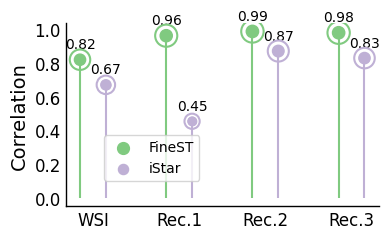

In [76]:
import matplotlib.pyplot as plt
import numpy as np

##############################
# if 5 regions, then l=5
# if 4 regions, then l=4
##############################
l = 4

# 创建自定义图形大小
fig, ax = plt.subplots(figsize=(4.0, 2.5))   # for l=4 
# fig, ax = plt.subplots(figsize=(4.5, 3.0))   # for l=5


# 绘制茎叶图
# x_pos = np.arange(len(corr_TransImpsc))
x_pos = np.array([1.5, 2, 2.5, 3])    # for l=4
# x_pos = np.array([1.5, 2, 2.5, 3, 3.5])    # for l=5
width = 0.3


_, stemline1, baseline1 = ax.stem(x_pos - width/l, corr_TransImpsc, linefmt="#80CA80", basefmt=" ", use_line_collection=True)
_, stemline2, baseline2 = ax.stem(x_pos + width/l, corr_Visiumspot, linefmt="#BFB0D5", basefmt=" ", use_line_collection=True)

# 设置茎的颜色
plt.setp(stemline1, 'color', '#80CA80')
plt.setp(stemline2, 'color', '#BFB0D5')

# 设置基线颜色为透明
plt.setp(baseline1, 'color', 'none')
plt.setp(baseline2, 'color', 'none')

# 绘制标记，标记的大小与纵轴值成比例
marker_size_factor = 80  # 你可以调整这个值来改变标记的大小
ax.scatter(x_pos - width/l, corr_TransImpsc, s=np.array(corr_TransImpsc) * marker_size_factor, color='#80CA80', label="FineST", zorder=3)
ax.scatter(x_pos + width/l, corr_Visiumspot, s=np.array(corr_Visiumspot) * marker_size_factor, color='#BFB0D5', label="iStar", zorder=3)

# 在每个点上添加一个圆环
ring_size_factor = 3.3  # 你可以调整这个值来改变圆环的大小
ax.scatter(x_pos - width/l, corr_TransImpsc, s=np.array(corr_TransImpsc) * marker_size_factor * ring_size_factor, facecolors='none', edgecolors='#80CA80', linewidths=1.5, zorder=4)
ax.scatter(x_pos + width/l, corr_Visiumspot, s=np.array(corr_Visiumspot) * marker_size_factor * ring_size_factor, facecolors='none', edgecolors='#BFB0D5', linewidths=1.5, zorder=4)

# 在每个点上添加纵轴数值，增加垂直偏移量以避免与圆点重叠
for i, txt in enumerate(corr_TransImpsc):
    ax.text(x_pos[i] - width/l, txt + 0.05, "{:.2f}".format(txt), ha='center', va='bottom')
for i, txt in enumerate(corr_Visiumspot):
    ax.text(x_pos[i] + width/l, txt + 0.05, "{:.2f}".format(txt), ha='center', va='bottom')
    
# 设置x轴标签
ax.set_xticks(x_pos)
ax.set_xticklabels(["WSI", "Rec.1", "Rec.2", "Rec.3"], fontsize=12)
# ax.set_xticklabels(["WSI", "Rec.1", "Rec.2", "Rec.3", "Rec.4"], fontsize=12)

# 设置y轴标签
ax.set_ylabel("Correlation", fontsize=14)

# 设置标题
# ax.set_title("Cell type correlation across whole slide and four ROIs", fontsize=16)

# 设置图形边框样式
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_linewidth(1)
ax.spines["bottom"].set_linewidth(1)

# 设置刻度样式
ax.tick_params(axis="both", which="both", length=0, labelsize=12)

# 调整y轴刻度和网格线
ax.set_yticks(np.arange(0, 1.1, 0.2))  # 设置y轴刻度为0, 0.2, 0.4, ... 1.0

# 添加图例
ax.legend(loc=3, bbox_to_anchor=(0.1, 0.1))    # loc= "upper left", bbox_to_anchor=(1, 1)

# 显示图形
plt.tight_layout()
plt.savefig("cor_celltype_Res_CRC16_3_Recs.pdf", dpi=300)
plt.show()

## 4. Colicalization analysis

**4.1 ROI region**

In [5]:
import os
# path = '/Users/lilingyu/E/PhD/Python/'
# path = '/storage3/yhhuang/users/lingyu/'
# path = '/data/users/lingyu/'
# path = '/home/lly/Python/'
path = '/mnt/lingyu/nfs_share2/Python/'

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
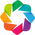

SpatailDM version: 0.2.0


In [6]:
import os
import pandas as pd
import numpy as np
import anndata as ann

import spatialdm as sdm
from spatialdm.datasets import dataset
import spatialdm.plottings as pl
import matplotlib.pyplot as plt
print("SpatailDM version: %s" %sdm.__version__)

In [7]:
#####################################################
# input original adata, use too much times
#####################################################

import os
import scanpy as sc
os.chdir(str(path)+'FineST/FineST_local/Dataset/CRC16um/TransImp/ResultsROIs/')
st_adata = sc.read_h5ad("CRC_square_016um_clty_ROI1.h5ad")
st_adata

AnnData object with n_obs × n_vars = 2587 × 862
    obs: 'array_row', 'array_col', 'cell_type', 'ROI1'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells'
    uns: 'pca', 'spatial'
    obsm: 'TransImp_ct_pred', 'X_pca', 'spatial'
    varm: 'PCs'

In [8]:
st_adata.obsm['TransImp_ct_pred'].head()

,Adipocyte,CAF,CD4 T cell,CD8 Cytotoxic T cell,Endothelial,Enteric Glial,Enterocyte,Epithelial,Fibroblast,Goblet,...,Smooth Muscle,Tuft,Tumor I,Tumor II,Tumor III,Tumor V,Unknown III (SM),mRegDC,pDC,vSM
s_016um_00163_00089-1,0.000000e+00,0.488770,1.787883e-01,0.000000,0.000000,9.776489e-02,0.000000e+00,7.397961e-36,1.960882e-01,3.220242e-36,...,0.001513,2.403286e-39,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.000000
s_016um_00164_00089-1,3.344649e-08,0.630756,8.695250e-02,0.057773,0.000000,8.345845e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.109495,0.000000e+00,4.992826e-42,2.951714e-11,0.0,0.0,0.000000e+00,0.0,0.0,0.000000
s_016um_00165_00089-1,2.235015e-40,0.579321,4.279547e-21,0.287201,0.000235,2.104364e-04,3.297280e-03,1.335535e-15,9.742477e-04,0.000000e+00,...,0.120314,0.000000e+00,5.817564e-04,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.002028
s_016um_00166_00089-1,7.721155e-43,0.843458,6.654277e-05,0.034887,0.000000,1.357328e-35,2.403271e-17,1.012292e-31,0.000000e+00,0.000000e+00,...,0.060294,0.000000e+00,1.676953e-02,7.721155e-43,0.0,0.0,9.124499e-33,0.0,0.0,0.000000
s_016um_00167_00089-1,9.867061e-40,0.748123,1.177898e-02,0.015890,0.000000,1.787505e-13,0.000000e+00,9.759231e-13,2.447238e-13,2.479419e-24,...,0.151421,0.000000e+00,9.036078e-05,1.522437e-33,0.0,0.0,0.000000e+00,0.0,0.0,0.000000


In [9]:
cell_type_gt_order = ["Adipocyte", "CAF", "CD4 T cell", "CD8 Cytotoxic T cell", "Endothelial", 
                "Enteric Glial", "Enterocyte", "Epithelial", "Fibroblast", "Goblet", 
                "Lymphatic Endothelial", "Macrophage", "Mast", "Mature B", "mRegDC", 
                "Myofibroblast", "Neuroendocrine", "Neutrophil", "pDC", "Pericytes", 
                "Plasma", "Proliferating Immune II", "QC_Filtered", "SM Stress Response", 
                "Smooth Muscle", "Tuft", "Tumor I", "Tumor II", "Tumor III", "Tumor V", 
                "Unknown III (SM)", "vSM"]
len(cell_type_gt_order)

32

In [10]:
st_adata.obsm['TransImp_ct_pred'] = st_adata.obsm['TransImp_ct_pred'][cell_type_gt_order]
st_adata.obsm['TransImp_ct_pred'].head()

,Adipocyte,CAF,CD4 T cell,CD8 Cytotoxic T cell,Endothelial,Enteric Glial,Enterocyte,Epithelial,Fibroblast,Goblet,...,QC_Filtered,SM Stress Response,Smooth Muscle,Tuft,Tumor I,Tumor II,Tumor III,Tumor V,Unknown III (SM),vSM
s_016um_00163_00089-1,0.000000e+00,0.488770,1.787883e-01,0.000000,0.000000,9.776489e-02,0.000000e+00,7.397961e-36,1.960882e-01,3.220242e-36,...,0.0,0.000000e+00,0.001513,2.403286e-39,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000
s_016um_00164_00089-1,3.344649e-08,0.630756,8.695250e-02,0.057773,0.000000,8.345845e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.000000e+00,0.109495,0.000000e+00,4.992826e-42,2.951714e-11,0.0,0.0,0.000000e+00,0.000000
s_016um_00165_00089-1,2.235015e-40,0.579321,4.279547e-21,0.287201,0.000235,2.104364e-04,3.297280e-03,1.335535e-15,9.742477e-04,0.000000e+00,...,0.0,0.000000e+00,0.120314,0.000000e+00,5.817564e-04,0.000000e+00,0.0,0.0,0.000000e+00,0.002028
s_016um_00166_00089-1,7.721155e-43,0.843458,6.654277e-05,0.034887,0.000000,1.357328e-35,2.403271e-17,1.012292e-31,0.000000e+00,0.000000e+00,...,0.0,1.443383e-10,0.060294,0.000000e+00,1.676953e-02,7.721155e-43,0.0,0.0,9.124499e-33,0.000000
s_016um_00167_00089-1,9.867061e-40,0.748123,1.177898e-02,0.015890,0.000000,1.787505e-13,0.000000e+00,9.759231e-13,2.447238e-13,2.479419e-24,...,0.0,2.320998e-03,0.151421,0.000000e+00,9.036078e-05,1.522437e-33,0.0,0.0,0.000000e+00,0.000000


In [11]:
scale_factors = fst.json_load(f"{path}/FineST/FineST_local/Dataset/CRC16um/square_016um/")
print(scale_factors)

{'spot_diameter_fullres': 58.417196833905315, 'bin_size_um': 16.0, 'microns_per_pixel': 0.27389195078106876, 'regist_target_img_scalef': 0.07973422, 'tissue_lowres_scalef': 0.007973422, 'fiducial_diameter_fullres': 1204.854684699297, 'tissue_hires_scalef': 0.07973422}


In [12]:
# Cost too much times
#####################################################
fst.weight_matrix(st_adata, l=scale_factors['spot_diameter_fullres'], cutoff=0.001, single_cell=True)

AnnData object with n_obs × n_vars = 2587 × 862
    obs: 'array_row', 'array_col', 'cell_type', 'ROI1'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells'
    uns: 'pca', 'spatial', 'single_cell'
    obsm: 'TransImp_ct_pred', 'X_pca', 'spatial'
    varm: 'PCs'
    obsp: 'weight', 'nearest_neighbors'

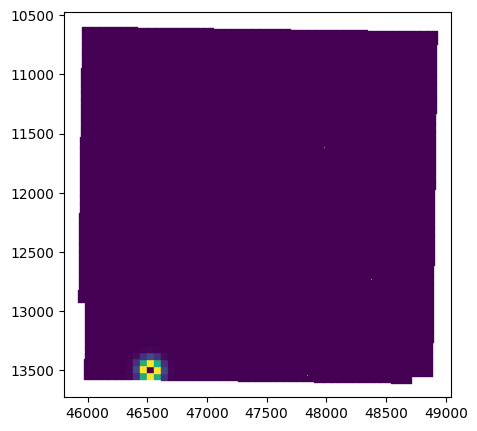

In [13]:
## Visualize the range of interaction
plt.figure(figsize=(5, 5))
plt.scatter(st_adata.obsm['spatial'][:,0], st_adata.obsm['spatial'][:,1],
            c=st_adata.obsp['weight'].A[500], marker='s', s=18.5)
plt.gca().invert_yaxis()  
plt.show()

In [14]:
st_adata.to_df().head()

,TGFB1,TGFBR1,TGFBR2,TGFB2,TGFB3,ACVR1B,ACVR1C,ACVR1,BMP2,BMPR1A,...,TREM2,SEMA6A,SEMA6B,SEMA7A,PLXNC1,SIGLEC1,THY1,VCAM1,VSIR,IGSF11
s_016um_00163_00089-1,0.004899,0.071891,0.093829,0.005451,0.021294,0.004716,0.003930,0.005401,0.004349,0.047862,...,0.004770,0.004489,0.004476,0.004505,0.053536,0.004641,0.110934,0.004664,0.004606,0.003873
s_016um_00164_00089-1,0.008503,0.361094,0.027145,0.004721,0.010563,0.006259,0.004114,0.005281,0.004332,0.004920,...,0.007896,0.004617,0.004522,0.004492,0.336676,0.004525,0.138707,0.004597,0.004652,0.004001
s_016um_00165_00089-1,0.006281,0.110616,0.015949,0.004688,0.016965,0.004605,0.003788,0.007271,0.004332,0.008973,...,0.004351,0.004393,0.004455,0.004554,0.047222,0.004591,0.332198,0.009314,0.005787,0.003821
s_016um_00166_00089-1,0.004887,0.440701,0.049043,0.011045,0.031219,0.004738,0.003493,0.008696,0.004310,0.006885,...,0.004401,0.004476,0.004348,0.004480,0.012592,0.004478,1.211675,0.004712,0.004658,0.003673
s_016um_00167_00089-1,0.051227,0.495122,0.018927,0.019743,0.031376,0.004705,0.003514,0.011765,0.004568,0.011767,...,0.004658,0.004548,0.004619,0.004703,0.029937,0.004828,0.734036,0.011089,0.004841,0.003729


In [15]:
st_adata.var_names_make_unique()
## Normalize and log transform the data
sc.pp.normalize_total(st_adata, target_sum=1e4)
sc.pp.log1p(st_adata)

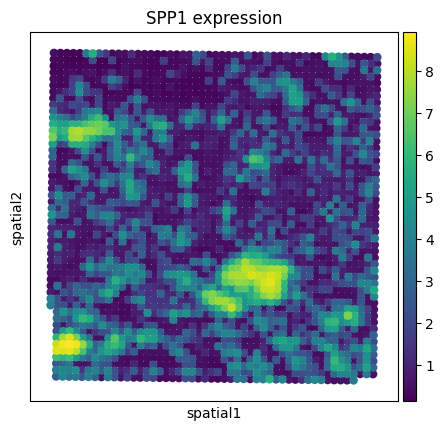

In [16]:
## original expression form Visium data
gene = 'SPP1'
sc.pl.spatial(st_adata, img_key=None, color=gene, title=f'{gene} expression', spot_size=78)

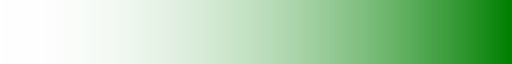

In [17]:
import matplotlib.colors as clr
c_white = clr.colorConverter.to_rgba('white',alpha = 0)
c_black= clr.colorConverter.to_rgba('Green',alpha = 1)
cmap_rb = clr.LinearSegmentedColormap.from_list('rb_cmap',[c_white,c_black],512)
cmap_rb

*** Calculate Moren_R using SpatialDM ***
*** Calculate DONE! ***


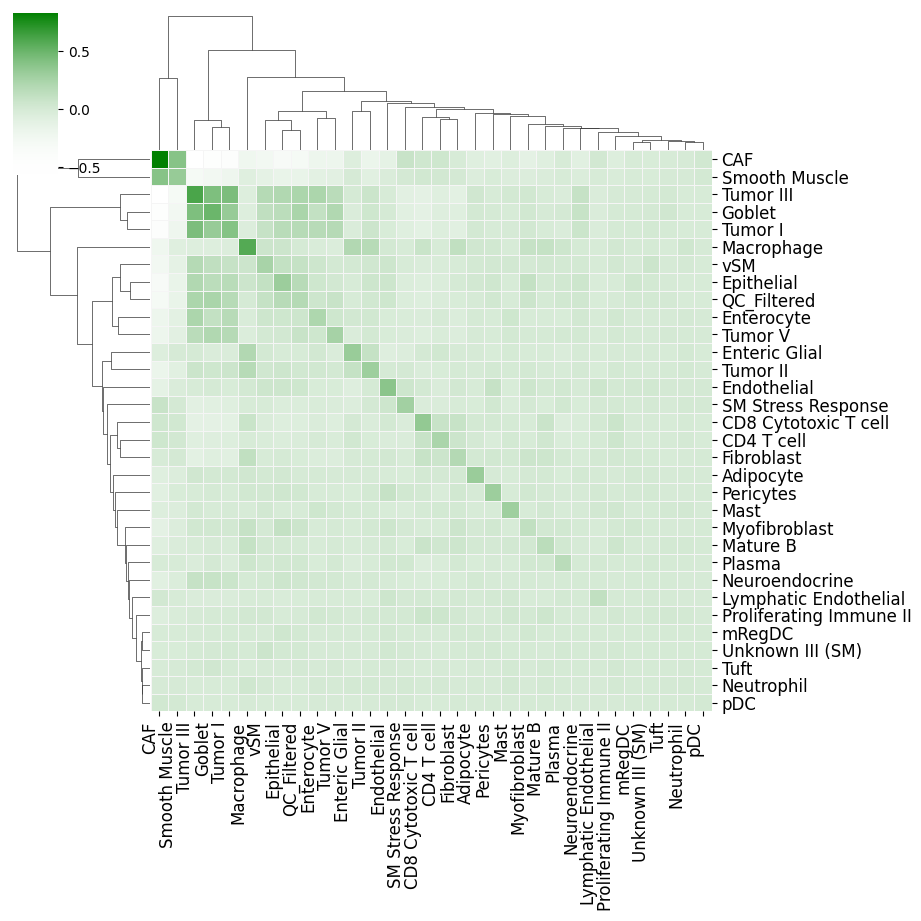

In [18]:
MoranR_matrix = fstplt.MoranR_colocalization(st_adata, cmap=cmap_rb, cell_type='TransImp_ct_pred', linecolor='whitesmoke', 
                       fig_size=(9, 9), font_size=12,  
                      trans=True, save_path="CRC16_heatmap_Fine_ROI1.svg")

In [22]:
#############
# heatmap
#############
# import seaborn as sns
# sns.heatmap(MoranR_matrix, cmap="coolwarm", xticklabels=1, yticklabels=1)

#############
## clustermap
#############
# sns.clustermap(MoranR_matrix, cmap=cmap_rb, linewidth=0.5, linecolor='whitesmoke', figsize=(9,9))   # cmap="viridis", 
# plt.savefig("CRC16_heatmap_Fine_ROI1.pdf", dpi=200)
# plt.show()

**4.2 ROI2 region**

In [24]:
st_adata_cltp2 = sc.read_h5ad("CRC_square_016um_clty_ROI2.h5ad")
st_adata_cltp2

AnnData object with n_obs × n_vars = 2599 × 862
    obs: 'array_row', 'array_col', 'cell_type', 'ROI2'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells'
    uns: 'pca', 'spatial'
    obsm: 'TransImp_ct_pred', 'X_pca', 'spatial'
    varm: 'PCs'

In [25]:
st_adata_cltp2.obsm['TransImp_ct_pred'] = st_adata_cltp2.obsm['TransImp_ct_pred'][cell_type_gt_order]
st_adata_cltp2.obsm['TransImp_ct_pred'].head()

,Adipocyte,CAF,CD4 T cell,CD8 Cytotoxic T cell,Endothelial,Enteric Glial,Enterocyte,Epithelial,Fibroblast,Goblet,...,QC_Filtered,SM Stress Response,Smooth Muscle,Tuft,Tumor I,Tumor II,Tumor III,Tumor V,Unknown III (SM),vSM
s_016um_00251_00193-1,0.000000e+00,0.000000e+00,0.046069,1.524908e-22,8.156285e-02,1.860462e-21,0.000000e+00,2.629501e-01,9.866615e-02,1.630622e-38,...,0.000000e+00,0.025456,0.059206,1.113061e-23,0.000068,1.154061e-03,0.000000,0.000000e+00,4.552231e-16,6.912103e-03
s_016um_00252_00193-1,1.633231e-21,0.000000e+00,0.049340,0.000000e+00,2.399926e-01,3.168083e-04,0.000000e+00,1.579546e-02,4.728505e-08,8.606286e-02,...,4.443504e-01,0.077837,0.041785,0.000000e+00,0.000000,0.000000e+00,0.000000,1.782691e-34,0.000000e+00,0.000000e+00
s_016um_00253_00193-1,1.974803e-36,1.972448e-24,0.115755,0.000000e+00,4.693110e-03,8.246967e-03,0.000000e+00,2.773863e-02,0.000000e+00,1.694002e-02,...,9.795076e-43,0.000201,0.051853,8.668082e-40,0.269575,0.000000e+00,0.488286,0.000000e+00,9.795076e-43,0.000000e+00
s_016um_00254_00193-1,8.324901e-23,0.000000e+00,0.060120,1.628312e-02,8.144570e-15,1.113509e-01,9.199464e-09,1.132993e-01,2.904892e-42,2.004405e-01,...,1.152396e-03,0.003629,0.016174,0.000000e+00,0.142745,1.513139e-11,0.325022,8.896883e-08,1.007791e-33,3.444374e-15
s_016um_00255_00193-1,0.000000e+00,0.000000e+00,0.007436,1.260908e-02,0.000000e+00,3.231064e-02,0.000000e+00,1.846911e-42,0.000000e+00,2.953495e-01,...,1.949220e-01,0.000000,0.010314,0.000000e+00,0.091223,1.065420e-22,0.355245,0.000000e+00,0.000000e+00,9.234557e-43


In [26]:
fst.weight_matrix(st_adata_cltp2, l=scale_factors['spot_diameter_fullres'], cutoff=0.001, single_cell=True)

AnnData object with n_obs × n_vars = 2599 × 862
    obs: 'array_row', 'array_col', 'cell_type', 'ROI2'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells'
    uns: 'pca', 'spatial', 'single_cell'
    obsm: 'TransImp_ct_pred', 'X_pca', 'spatial'
    varm: 'PCs'
    obsp: 'weight', 'nearest_neighbors'

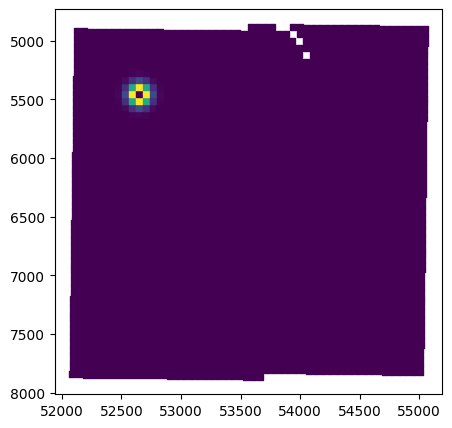

In [27]:
## Visualize the range of interaction
plt.figure(figsize=(5, 5))
plt.scatter(st_adata_cltp2.obsm['spatial'][:,0], st_adata_cltp2.obsm['spatial'][:,1],
            c=st_adata_cltp2.obsp['weight'].A[500], marker='s', s=18.5)
plt.gca().invert_yaxis()  
plt.show()

In [28]:
st_adata_cltp2.var_names_make_unique()
## Normalize and log transform the data
sc.pp.normalize_total(st_adata_cltp2, target_sum=1e4)
sc.pp.log1p(st_adata_cltp2)

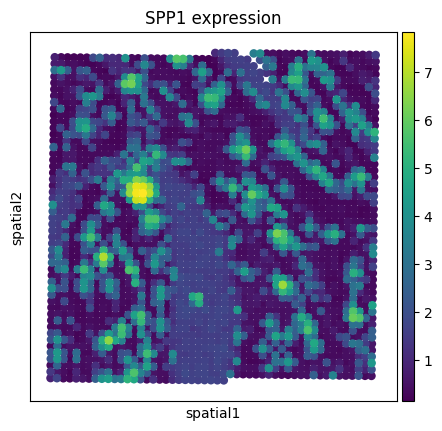

In [29]:
## original expression form Visium data
gene = 'SPP1'
sc.pl.spatial(st_adata_cltp2, img_key=None, color=gene, title=f'{gene} expression', spot_size=78)

*** Calculate Moren_R using SpatialDM ***
*** Calculate DONE! ***


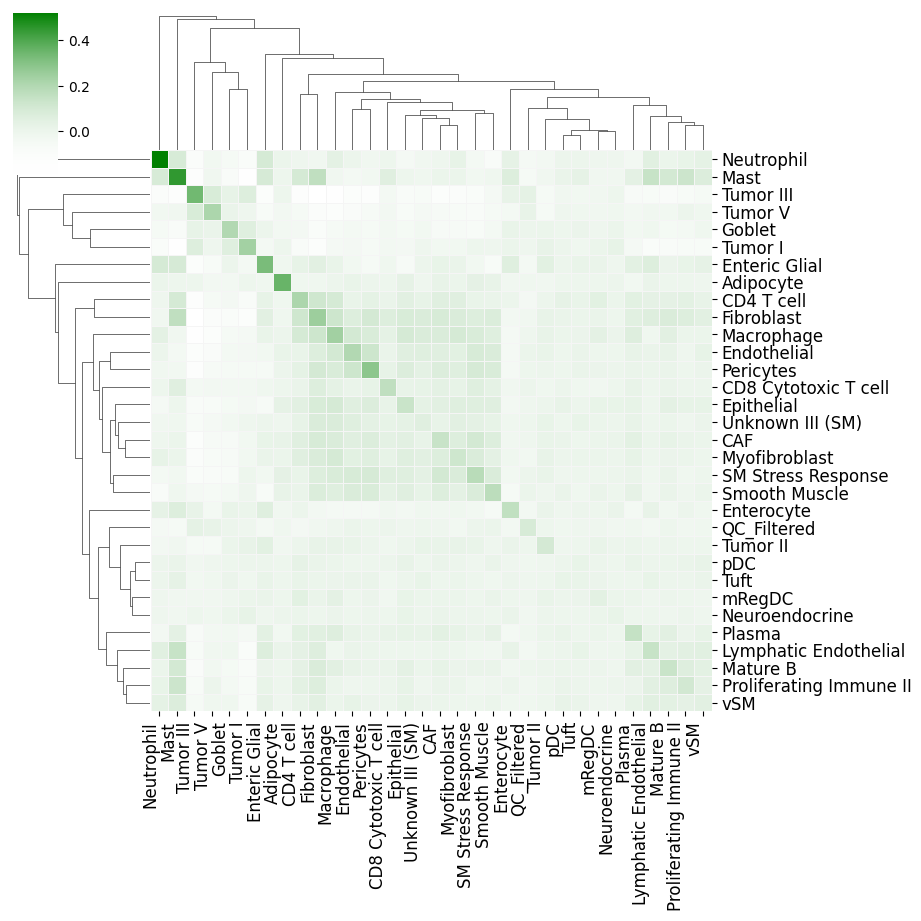

In [31]:
MoranR_matrix2 = fstplt.MoranR_colocalization(st_adata_cltp2, cmap=cmap_rb, cell_type='TransImp_ct_pred', linecolor='whitesmoke', 
                       fig_size=(9, 9), font_size=12,  
                      trans=True, save_path="CRC16_heatmap_Fine_ROI2.svg")

**4.3 ROI3 region**

In [32]:
st_adata_cltp3 = sc.read_h5ad("CRC_square_016um_clty_ROI3.h5ad")
st_adata_cltp3

AnnData object with n_obs × n_vars = 2642 × 862
    obs: 'array_row', 'array_col', 'cell_type', 'ROI3'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells'
    uns: 'pca', 'spatial'
    obsm: 'TransImp_ct_pred', 'X_pca', 'spatial'
    varm: 'PCs'

In [33]:
st_adata_cltp3.obsm['TransImp_ct_pred'] = st_adata_cltp3.obsm['TransImp_ct_pred'][cell_type_gt_order]
st_adata_cltp3.obsm['TransImp_ct_pred'].head()

,Adipocyte,CAF,CD4 T cell,CD8 Cytotoxic T cell,Endothelial,Enteric Glial,Enterocyte,Epithelial,Fibroblast,Goblet,...,QC_Filtered,SM Stress Response,Smooth Muscle,Tuft,Tumor I,Tumor II,Tumor III,Tumor V,Unknown III (SM),vSM
s_016um_00175_00203-1,2.126556e-03,0.694723,0.023385,0.026115,0.0,0.198337,0.000000e+00,0.0,2.671346e-04,0.000000e+00,...,0.000000e+00,0.000000,0.055047,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.227624e-32,5.146084e-25,0.000000e+00
s_016um_00176_00203-1,1.927501e-03,0.644793,0.033626,0.033939,0.0,0.018202,0.000000e+00,0.0,0.000000e+00,0.000000e+00,...,3.516601e-08,0.149078,0.046687,1.141714e-33,0.000000e+00,1.086601e-28,3.129933e-39,0.000000e+00,0.000000e+00,0.000000e+00
s_016um_00177_00203-1,0.000000e+00,0.638640,0.080466,0.035860,0.0,0.000000,5.228066e-28,0.0,8.702574e-26,2.332796e-34,...,0.000000e+00,0.079723,0.034586,0.000000e+00,3.426403e-02,3.698048e-12,9.271454e-08,0.000000e+00,0.000000e+00,0.000000e+00
s_016um_00178_00203-1,0.000000e+00,0.657634,0.000004,0.013592,0.0,0.000000,0.000000e+00,0.0,0.000000e+00,0.000000e+00,...,0.000000e+00,0.134311,0.037000,0.000000e+00,3.812294e-02,1.544480e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
s_016um_00179_00203-1,3.486028e-38,0.595163,0.006707,0.014205,0.0,0.000000,0.000000e+00,0.0,0.000000e+00,0.000000e+00,...,0.000000e+00,0.181685,0.000000,0.000000e+00,5.327438e-07,1.625863e-01,0.000000e+00,0.000000e+00,0.000000e+00,2.086763e-13


In [34]:
fst.weight_matrix(st_adata_cltp3, l=scale_factors['spot_diameter_fullres'], cutoff=0.001, single_cell=True)

AnnData object with n_obs × n_vars = 2642 × 862
    obs: 'array_row', 'array_col', 'cell_type', 'ROI3'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells'
    uns: 'pca', 'spatial', 'single_cell'
    obsm: 'TransImp_ct_pred', 'X_pca', 'spatial'
    varm: 'PCs'
    obsp: 'weight', 'nearest_neighbors'

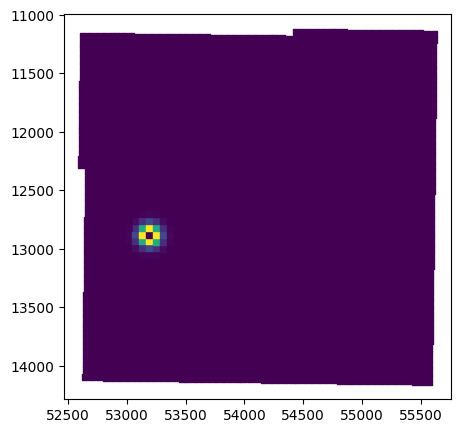

In [35]:
## Visualize the range of interaction
plt.figure(figsize=(5, 5))
plt.scatter(st_adata_cltp3.obsm['spatial'][:,0], st_adata_cltp3.obsm['spatial'][:,1],
            c=st_adata_cltp3.obsp['weight'].A[500], marker='s', s=18.5)
plt.gca().invert_yaxis()  
plt.show()

In [36]:
st_adata_cltp3.var_names_make_unique()
## Normalize and log transform the data
sc.pp.normalize_total(st_adata_cltp3, target_sum=1e4)
sc.pp.log1p(st_adata_cltp3)

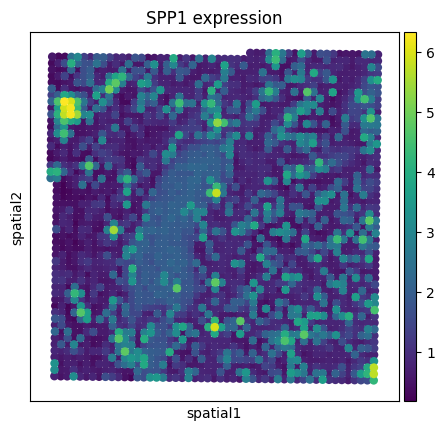

In [37]:
## original expression form Visium data
gene = 'SPP1'
sc.pl.spatial(st_adata_cltp3, img_key=None, color=gene, title=f'{gene} expression', spot_size=78)

*** Calculate Moren_R using SpatialDM ***
*** Calculate DONE! ***


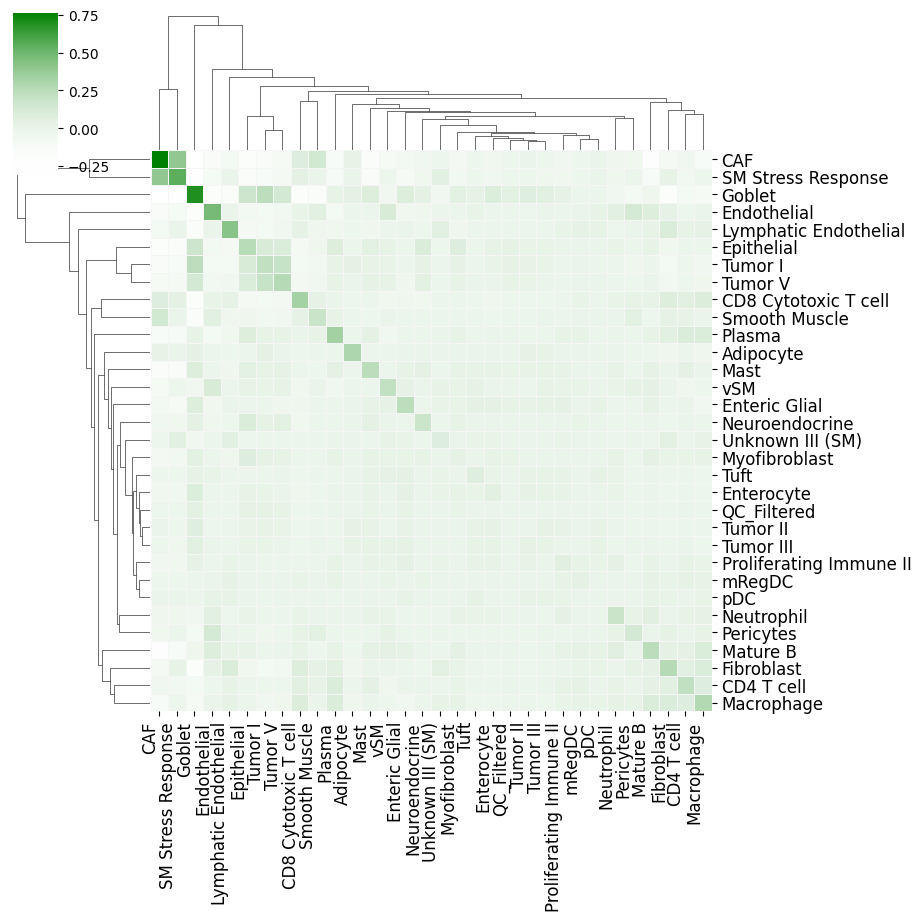

In [38]:
MoranR_matrix3 = fstplt.MoranR_colocalization(st_adata_cltp3, cmap=cmap_rb, cell_type='TransImp_ct_pred', linecolor='whitesmoke', 
                                              fig_size=(9, 9), font_size=12,  
                                              trans=True, save_path="CRC16_heatmap_Fine_ROI3.svg")

**4.3 ROI4 region**

In [39]:
st_adata_cltp4 = sc.read_h5ad("CRC_square_016um_clty_ROI4.h5ad")
st_adata_cltp4

AnnData object with n_obs × n_vars = 2625 × 862
    obs: 'array_row', 'array_col', 'cell_type', 'ROI4'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells'
    uns: 'pca', 'spatial'
    obsm: 'TransImp_ct_pred', 'X_pca', 'spatial'
    varm: 'PCs'

In [194]:
# cell_type_gt_order = ["Adipocyte", "CAF", "CD4 T cell", "CD8 Cytotoxic T cell", "Endothelial", 
#                 "Enteric Glial", "Enterocyte", "Epithelial", "Fibroblast", "Goblet", 
#                 "Lymphatic Endothelial", "Macrophage", "Mast", "Mature B", "mRegDC", 
#                 "Myofibroblast", "Neuroendocrine", "Neutrophil", "pDC", "Pericytes", 
#                 "Plasma", "Proliferating Immune II", "QC_Filtered", "SM Stress Response", 
#                 "Smooth Muscle", "Tuft", "Tumor I", "Tumor II", "Tumor III", "Tumor V", 
#                 "Unknown III (SM)", "vSM"]
# len(cell_type_gt_order)

32

In [40]:
st_adata_cltp4.obsm['TransImp_ct_pred'] = st_adata_cltp4.obsm['TransImp_ct_pred'][cell_type_gt_order]
st_adata_cltp4.obsm['TransImp_ct_pred'].head()

,Adipocyte,CAF,CD4 T cell,CD8 Cytotoxic T cell,Endothelial,Enteric Glial,Enterocyte,Epithelial,Fibroblast,Goblet,...,QC_Filtered,SM Stress Response,Smooth Muscle,Tuft,Tumor I,Tumor II,Tumor III,Tumor V,Unknown III (SM),vSM
s_016um_00114_00126-1,5.653400e-03,1.167638e-15,0.052701,0.001478,0.0,1.394750e-02,0.000000e+00,1.136185e-37,6.596331e-39,0.082782,...,0.166338,0.000000e+00,0.000000e+00,0.000000e+00,2.039302e-29,4.621913e-05,0.160427,4.270982e-01,0.000000e+00,0.000000e+00
s_016um_00115_00126-1,2.267301e-42,0.000000e+00,0.124903,0.030237,0.0,3.506991e-02,0.000000e+00,0.000000e+00,4.758173e-38,0.321942,...,0.000000,1.054626e-38,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.061189,1.864876e-01,0.000000e+00,0.000000e+00
s_016um_00116_00126-1,3.575604e-03,0.000000e+00,0.078516,0.000000,0.0,9.304640e-02,2.529140e-22,0.000000e+00,0.000000e+00,0.145664,...,0.000000,0.000000e+00,5.395050e-24,0.000000e+00,2.022411e-05,0.000000e+00,0.293446,2.013666e-42,7.037033e-05,2.637195e-02
s_016um_00117_00126-1,1.165819e-04,0.000000e+00,0.051513,0.018600,0.0,2.291696e-02,2.402983e-39,2.574278e-26,0.000000e+00,0.184359,...,0.120894,0.000000e+00,4.815227e-38,2.291737e-32,4.256175e-26,1.517606e-42,0.403459,6.223073e-03,0.000000e+00,6.619142e-02
s_016um_00118_00126-1,3.367320e-42,0.000000e+00,0.000011,0.013205,0.0,2.242137e-28,6.300837e-07,9.534018e-20,8.366777e-11,0.084805,...,0.448446,3.909248e-07,2.379144e-05,0.000000e+00,1.480678e-01,6.961661e-02,0.000124,2.356943e-01,2.215067e-20,1.515266e-40


In [41]:
fst.weight_matrix(st_adata_cltp4, l=scale_factors['spot_diameter_fullres'], cutoff=0.001, single_cell=True)

AnnData object with n_obs × n_vars = 2625 × 862
    obs: 'array_row', 'array_col', 'cell_type', 'ROI4'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells'
    uns: 'pca', 'spatial', 'single_cell'
    obsm: 'TransImp_ct_pred', 'X_pca', 'spatial'
    varm: 'PCs'
    obsp: 'weight', 'nearest_neighbors'

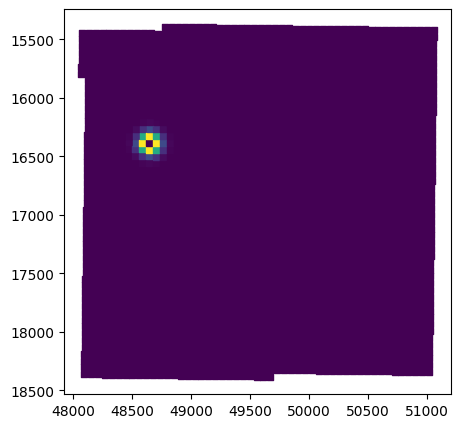

In [42]:
## Visualize the range of interaction
plt.figure(figsize=(5, 5))
plt.scatter(st_adata_cltp4.obsm['spatial'][:,0], st_adata_cltp4.obsm['spatial'][:,1],
            c=st_adata_cltp4.obsp['weight'].A[500], marker='s', s=18.5)
plt.gca().invert_yaxis()  
plt.show()

In [43]:
st_adata_cltp4.var_names_make_unique()
## Normalize and log transform the data
sc.pp.normalize_total(st_adata_cltp4, target_sum=1e4)
sc.pp.log1p(st_adata_cltp4)

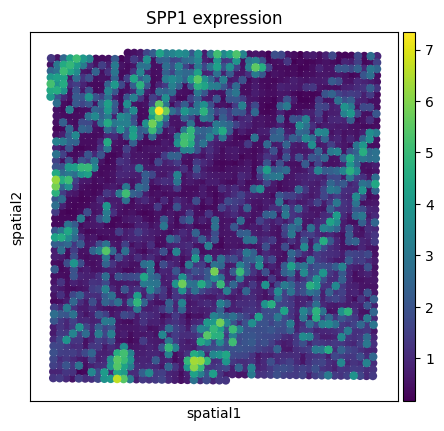

In [44]:
## original expression form Visium data
gene = 'SPP1'
sc.pl.spatial(st_adata_cltp4, img_key=None, color=gene, title=f'{gene} expression', spot_size=78)

*** Calculate Moren_R using SpatialDM ***
*** Calculate DONE! ***


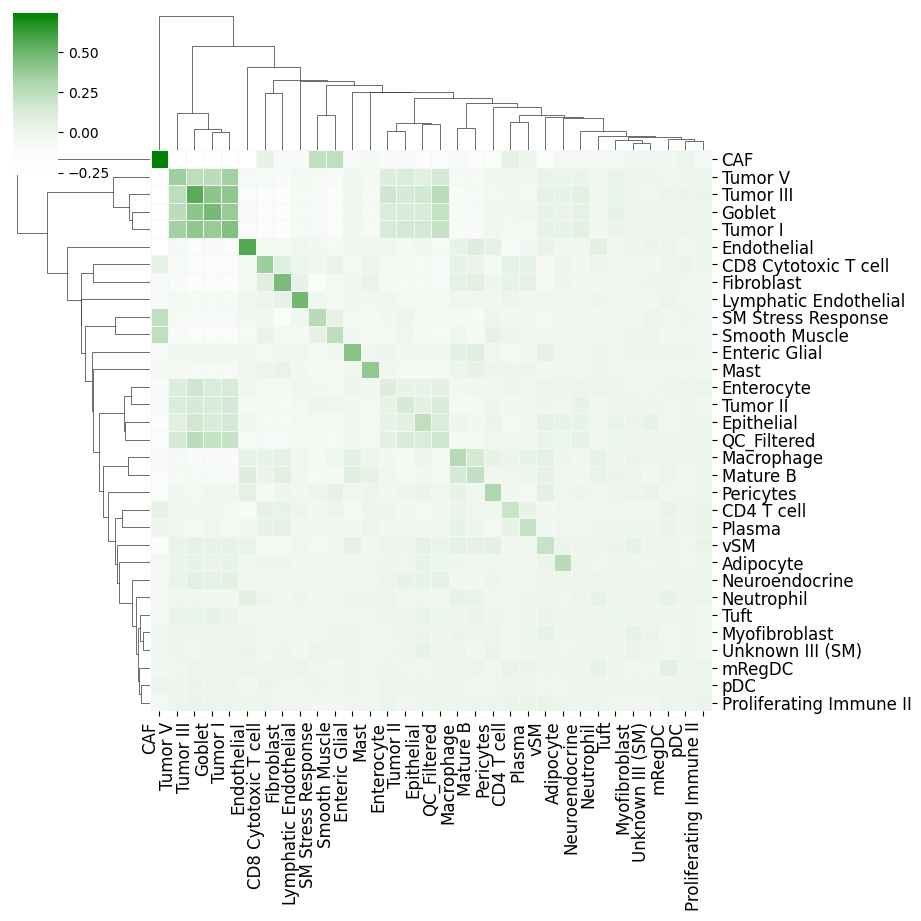

In [45]:
MoranR_matrix4 = fstplt.MoranR_colocalization(st_adata_cltp4, cmap=cmap_rb, cell_type='TransImp_ct_pred', linecolor='whitesmoke', 
                                              fig_size=(9, 9), font_size=12,  
                                              trans=True, save_path="CRC16_heatmap_Fine_ROI4.svg")

## 5. Run time on Visium HD 16um

In [120]:
import matplotlib.pyplot as plt
import numpy as np

time = pd.read_excel(str(path)+'FineST/FineST_local/Dataset/Run_times_update.xlsx', sheet_name='Sheet4')
time

,Task,FineST,iStar,SpatialDM,Others,SparseAEH,SpatialDE
0,Image embeddings extraction,30.0,20.0,NaN,NaN,NaN,NaN
1,Train model & infer gene expr.,157.0,135.0,NaN,NaN,NaN,NaN
2,Significant LR pair discovery,NaN,NaN,24.0,30.0,NaN,NaN
3,CCC pattern detection,NaN,NaN,NaN,NaN,7.0,100.0


In [36]:
!pwd
os.chdir(str(path)+'VisiumHD/Dataset/Colon_Cancer/Time_compare')
!pwd

/mnt/lingyu/nfs_share2/Python/VisiumHD/Dataset/Colon_Cancer/Time_compare
/mnt/lingyu/nfs_share2/Python/VisiumHD/Dataset/Colon_Cancer/Time_compare


In [121]:
time = time.drop('Others', axis=1)
time

,Task,FineST,iStar,SpatialDM,SparseAEH,SpatialDE
0,Image embeddings extraction,30.0,20.0,NaN,NaN,NaN
1,Train model & infer gene expr.,157.0,135.0,NaN,NaN,NaN
2,Significant LR pair discovery,NaN,NaN,24.0,NaN,NaN
3,CCC pattern detection,NaN,NaN,NaN,7.0,100.0


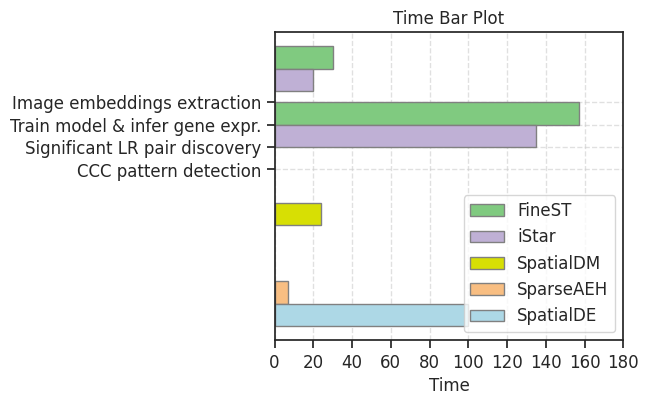

In [180]:
fst.plot_time_bars(time, bar_height = 0.4, fig_size=(4.5, 4), 
                   # inter_value_l=40, inter_value_r=90, end=180,
                   # trans=True, format='svg', save_path='Time_bar_all.svg')
                    trans=True)